<a href="https://colab.research.google.com/github/JoaoVitorSesma/Predicao-da-Sobrevida-em-Pacientes-com-Cancer-Colorretal-IC/blob/main/Banco_de_Dados_(Lifelines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <font size="24" color=#EEDD82 face="Times New Roman"> * **‚úß** *</font><font size="24" color=#EEDD82 face="Times New Roman"> **COX** </font><font size="24" color=#EEDD82 face="Times New Roman">* **‚úß** *</font>



### <font color=#FFB90F>**Importa√ß√µes**


---

*   [Scikit-Survival](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html)

*   [Lifelines](https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#cox-s-proportional-hazard-model)

*   [Seaborn](https://seaborn.pydata.org/)

---

<font color = "#00FF00"> Banco de Dados obtidos a partir da pr√≥pria bilioteca do Scikit-Survival, usando como dataset base: [load_breast_cancer](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.datasets.load_breast_cancer.html#id4). Este dataset tem um tototal de </font> <font color = #FF69B4>198 amostras (pacientes)</font> <font color = "#00FF00"> e </font> </font> <font color = #FF6A6A> 82 recursos (vari√°veis).

In [ ]:
!pip install scikit-survival --quiet
!pip install lifelines --quiet
!pip install seaborn --quiet

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.0/49.0 kB 1.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.7/3.7 MB 6.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.3/13.3 MB 65.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 349.3/349.3 kB 5.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 94.5/94.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sksurv.datasets import load_breast_cancer
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Configura o scikit-learn para exibir os estimadores em formato de texto
set_config(display="text")

### <font color=#FFB90F>**Processamento dos Dados**

#### <font color = #63B8FF>**Explica√ß√£o**

---

<font color=00BFFF00BFFF#00FF7F>No processamento de dados, o conjunto de dados de c√¢ncer de mama √© carregado e s√£o feitas as primeiras an√°lises do banco de dados. Sobre o conjunto de dados, dividimos ele entre 2 vari√°veis, "X" e "y", onde representam respectivamente, as caracter√≠sticas dos pacientes e a outra cont√©m informa√ß√µes de sobreviv√™ncia (tempo de sobreviv√™ncia e se o evento de interesse, como a morte, ocorreu).

---

*  <font color=#FF0000#DAA520>**OneHotEncoder:**</font> Transforma vari√°veis categ√≥ricas em vari√°veis bin√°rias (0 ou 1).

* <font color=#FF0000#DAA520>**Xt['days'] e Xt['event']:**</font> Adiciona colunas ao DataFrame transformado para indicar o tempo de sobreviv√™ncia (days) e se o evento ocorreu (event), invertendo, para melhorar o banco de dados, os valores de event para que True indique morte e False indique censura (sobreviv√™ncia ou perda de acompanhamento).

---

#### <font color = 	#C0FF3E>**C√≥digo**

In [ ]:
X, y = load_breast_cancer() # Carrega o conjunto de dados de c√¢ncer de mama, retornando X (caracter√≠sticas) e y (dados de sobreviv√™ncia)
Xt = OneHotEncoder().fit_transform(X) # Transforma os dados categ√≥ricos em vari√°veis bin√°rias
Xt.round(2).head() # Exibe as primeiras linhas do DataFrame

X200726_at  X200965_s_at  X201068_s_at  X201091_s_at  X201288_at  \
0       10.93          8.96         11.63         10.96       11.52   
1       12.24          9.53         12.63         11.59       12.32   
2       11.66         10.24         12.57          9.17       11.70   
3       12.17          9.82         12.11          9.09       13.13   
4       11.48         11.49         11.78          8.89       10.43   

   X201368_at  X201663_s_at  X201664_at  X202239_at  X202240_at  ...  \
0       12.04          9.62        9.81       10.02        7.85  ...   
1       10.78         10.60       10.70       10.16        8.74  ...   
2       11.35          9.38       10.16       10.03        8.13  ...   
3       11.86          8.40        8.67       10.73        8.65  ...   
4       11.40          7.74        8.64        9.56        8.48  ...   

   X221816_s_at  X221882_s_at  X221916_at  X221928_at   age  er=positive  \
0         10.13         10.93        6.48        5.99  57.0          0.0   
1         10.21          9.56        4.97        7.05  57.0          1.0   
2         10.16          9.31        4.28        6.83  48.0          0.0   
3         10.66         10.21        5.71        6.93  42.0          1.0   
4         11.57         10.93        5.82        6.66  46.0          1.0   

   grade=intermediate  grade=poorly differentiated  grade=unkown  size  
0                 0.0                          1.0           0.0   3.0  
1                 0.0                          1.0           0.0   3.0  
2                 0.0                          1.0           0.0   2.5  
3                 0.0                          1.0           0.0   1.8  
4                 1.0                          0.0           0.0   3.0  

[5 rows x 82 columns]

In [ ]:
# Exibe os nomes das colunas do DataFrame
print(Xt.columns)

Index(['X200726_at', 'X200965_s_at', 'X201068_s_at', 'X201091_s_at',
       'X201288_at', 'X201368_at', 'X201663_s_at', 'X201664_at', 'X202239_at',
       'X202240_at', 'X202418_at', 'X202687_s_at', 'X203306_s_at',
       'X203391_at', 'X204014_at', 'X204015_s_at', 'X204073_s_at',
       'X204218_at', 'X204540_at', 'X204631_at', 'X204740_at', 'X204768_s_at',
       'X204888_s_at', 'X205034_at', 'X205848_at', 'X206295_at',
       'X207118_s_at', 'X208180_s_at', 'X208683_at', 'X209500_x_at',
       'X209524_at', 'X209835_x_at', 'X209862_s_at', 'X210028_s_at',
       'X210314_x_at', 'X210593_at', 'X211040_x_at', 'X211382_s_at',
       'X211762_s_at', 'X211779_x_at', 'X212014_x_at', 'X212567_s_at',
       'X214806_at', 'X214915_at', 'X214919_s_at', 'X215510_at',
       'X215633_x_at', 'X216010_x_at', 'X216103_at', 'X216693_x_at',
       'X217019_at', 'X217102_at', 'X217404_s_at', 'X217471_at', 'X217767_at',
       'X217771_at', 'X217815_at', 'X218430_s_at', 'X218478_s_at',
       'X218533_

In [ ]:
# Exibe o n√∫mero de colunas do DataFrame original
print(Xt.shape[1])

82


In [ ]:
# Vari√°vel y com um tupla contendo (event, days)
Xt['days'] = [tup[-1] for tup in y] # Adiciona ao DataFrame transformado uma coluna 'days' que cont√©m o tempo de sobreviv√™ncia (dias)
Xt['event'] = [tup[0] for tup in y] # Adiciona uma coluna 'event' que indica se o evento (morte) ocorreu (1 para sim, 0 para n√£o)

# Para melhorar o banco de dados
Xt['event'] = [not x for x in Xt['event']] # Inverte os valores da coluna 'event' (True -> False e vice-versa)

In [ ]:
# Exibe a contagem de valores √∫nicos na coluna 'event'
Xt.event.value_counts()

event
True     147
False     51
Name: count, dtype: int64

In [ ]:
# Exibe o DataFrame final (Com event e days adicionado (82 vari√°veis + 2 novas (dias e evento)))
Xt

X200726_at  X200965_s_at  X201068_s_at  X201091_s_at  X201288_at  \
0     10.926361      8.962608     11.630078     10.964107   11.518305   
1     12.242090      9.531718     12.626106     11.594716   12.317659   
2     11.661716     10.238680     12.572919      9.166088   11.698658   
3     12.174021      9.819279     12.109888      9.086937   13.132617   
4     11.484011     11.489233     11.779285      8.887616   10.429663   
..          ...           ...           ...           ...         ...   
193   12.018292      8.323876     11.955274     10.740020   11.150428   
194   11.711415     10.428482     12.420877     11.145993   11.084685   
195   11.939616      9.615587     11.962812     10.463171   11.514539   
196   11.848449     10.528911     11.318453      8.609631   13.719035   
197   11.425778      9.901486     12.167550      9.011730   12.013692   

     X201368_at  X201663_s_at  X201664_at  X202239_at  X202240_at  ...  \
0     12.038527      9.623518    9.814798   10.016732    7.847383  ...   
1     10.776911     10.604577   10.704329   10.161838    8.744875  ...   
2     11.353333      9.384927   10.161654   10.032721    8.125487  ...   
3     11.859394      8.400839    8.670721   10.727427    8.650810  ...   
4     11.401139      7.741092    8.642018    9.556686    8.478862  ...   
..          ...           ...         ...         ...         ...  ...   
193   10.650873      8.787549    9.747182   10.176306    9.240307  ...   
194   11.169750     10.870530   11.128882    9.573702    9.287522  ...   
195   11.487394     10.443569   11.104227    9.051649    7.279063  ...   
196   12.909814      7.525994    8.255546    9.788903    7.343499  ...   
197   12.046090      9.254448    9.751310   10.701032    8.075518  ...   

     X221916_at  X221928_at   age  er=positive  grade=intermediate  \
0      6.477749    5.991885  57.0          0.0                 0.0   
1      4.968050    7.051130  57.0          1.0                 0.0   
2      4.283777    6.828986  48.0          0.0                 0.0   
3      5.713404    6.927251  42.0          1.0                 0.0   
4      5.817265    6.655448  46.0          1.0                 1.0   
..          ...         ...   ...          ...                 ...   
193    6.889179    5.892040  39.0          0.0                 0.0   
194    5.393927    6.421038  46.0          0.0                 0.0   
195    5.922925    6.979894  47.0          1.0                 0.0   
196    7.278383    7.195797  43.0          1.0                 1.0   
197    6.590989    8.034222  39.0          0.0                 0.0   

     grade=poorly differentiated  grade=unkown  size    days  event  
0                            1.0           0.0   3.0   723.0  False  
1                            1.0           0.0   3.0  6591.0   True  
2                            1.0           0.0   2.5   524.0  False  
3                            1.0           0.0   1.8  6255.0   True  
4                            0.0           0.0   3.0  3822.0  False  
..                           ...           ...   ...     ...    ...  
193                          1.0           0.0   2.2  5673.0   True  
194                          1.0           0.0   3.2   404.0  False  
195                          0.0           0.0   2.5  2225.0   True  
196                          0.0           0.0   1.2  2722.0   True  
197                          1.0           0.0   2.5  1781.0   True  

[198 rows x 84 columns]

### <font color=#FFB90F>**FIT**

#### <font color = #63B8FF>**Explica√ß√£o**

---

<font color=00BFFF00BFFF#00FF7F>Nesta parte, h√° o ajuste do modelo de Cox Proportional Hazards, que √© usado para investigar o efeito de v√°rias vari√°veis sobre o tempo at√© a ocorr√™ncia de um evento.

---

* <font color=#FF0000#DAA520>**CoxPHFitter():**</font> Cria um modelo de Cox ajustado para o modelo proporcional de hazard.

* <font color=#FF0000#DAA520>**fit():**</font> Ajusta o modelo aos dados, especificando as colunas que cont√™m o tempo de dura√ß√£o e o indicador de evento.

* <font color=#FF0000#DAA520>**print_summary():**</font> Exibe um sum√°rio com os resultados do ajuste, incluindo coeficientes de regress√£o, valores p, intervalos de confian√ßa, entre outros (documenta√ß√£o a baixo).

---

<font color=#FFB90F>**Par√¢metros Principais:**

* <font color=#FF0000#DAA520>**DataFrame:**</font> Contem as covari√°veis ou caracter√≠sticas dos indiv√≠duos. Cada linha corresponde a um indiv√≠duo (por exemplo, um paciente), e cada coluna corresponde a uma caracter√≠stica ou vari√°vel preditora.

* <font color=#FF0000#DAA520>**duration_col:**</font> Nome da coluna dentro de Xt que cont√©m o tempo de dura√ß√£o ou tempo de seguimento para cada indiv√≠duo. Este tempo representa o per√≠odo at√© a ocorr√™ncia do evento de interesse ou at√© o √∫ltimo acompanhamento, se o evento n√£o ocorreu (censura).

* <font color=#FF0000#DAA520>**event_col:**</font >Nome da coluna dentro de Xt que indica se o evento de interesse ocorreu (por exemplo, se o paciente morreu). √â uma coluna bin√°ria onde 1 indica que o evento ocorreu e 0 indica que o indiv√≠duo foi censurado (o evento n√£o ocorreu at√© o fim do per√≠odo de observa√ß√£o).

---

<font color=00BFFF00BFFF#00FF7F> O modelo de Cox √© ajustado aos dados. Este modelo busca uma rela√ß√£o linear entre as covari√°veis (logaritmo do risco relativo) e o logaritmo do tempo de falha (ou sobreviv√™ncia). O ajuste √© realizado utilizando m√©todos num√©ricos, como a maximiza√ß√£o da verossimilhan√ßa parcial, que considera a censura nos dados.

<font color=00BFFF00BFFF#00FF7F> O modelo tamb√©m assume que o hazard ratio √© uma fun√ß√£o exponencial das covari√°veis, e que o efeito dessas covari√°veis √© multiplicativo no tempo de risco.

---

<font color=#FFB90F>**OBS:**</font> Como o modelo de Cox assume que os hazards s√£o proporcionais ao longo do tempo. A fun√ß√£o fit() pode incluir verifica√ß√µes para garantir que essa suposi√ß√£o de proporcionalidade seja v√°lida. Se a suposi√ß√£o for violada, ajustes ou modifica√ß√µes ao modelo podem ser necess√°rios.

---

#### <font color=	#AB82FF>**Colunas**

#####<font color=#C0FF3E>**coef_(Coeficiente)**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> Representa o coeficiente de regress√£o estimado para cada vari√°vel independente no modelo de Cox. Ele indica a dire√ß√£o e magnitude da associa√ß√£o entre a vari√°vel e o risco de falha (evento). Um coeficiente positivo sugere que o aumento na vari√°vel est√° associado a um aumento no risco do evento, enquanto um coeficiente negativo indica uma associa√ß√£o protetora (redu√ß√£o do risco).
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Se uma vari√°vel como "idade" tem um coeficiente positivo, isso indicaria que pacientes mais velhos t√™m um risco maior de falhar (ex: morrer) em compara√ß√£o com pacientes mais jovens.

---

#####<font color=#C0FF3E>**exp(coef)_(Hazard Ratio)**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> √â a exponencia√ß√£o do coeficiente, conhecido como hazard ratio. Ele indica a raz√£o dos riscos de falha entre dois grupos que diferem em uma unidade na vari√°vel preditora. Se exp(coef) for maior que 1, isso sugere um aumento no risco associado ao aumento da vari√°vel; se for menor que 1, sugere um efeito protetor.
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Se exp(coef) for 1.5 para a vari√°vel "fumar", isso indica que indiv√≠duos que fumam t√™m um risco 50% maior de falha (ex: morrer) em compara√ß√£o com n√£o fumantes.

---

#####<font color=#C0FF3E>**se(coef)_(Erro Padr√£o do Coeficiente)**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> O erro padr√£o do coeficiente √© uma medida da incerteza na estimativa do coeficiente. Ele √© usado para calcular os intervalos de confian√ßa e os valores p associados ao coeficiente.
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Um alto erro padr√£o pode indicar que o coeficiente estimado √© inst√°vel, ou que h√° variabilidade nos dados que dificulta a obten√ß√£o de uma estimativa precisa.

---

#####<font color=#C0FF3E>**[coef lower 95% e coef upper 95%]_(Intervalo de Confian√ßa de 95% para o Coeficiente)**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> Esses valores representam o intervalo de confian√ßa para o coeficiente estimado no modelo.
Eles indicam a faixa na qual podemos ter 95% de certeza de que o verdadeiro valor do coeficiente se encontra.
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Se o intervalo de confian√ßa n√£o incluir zero, isso sugere que o efeito da vari√°vel √© estatisticamente significativo. Por exemplo, se o intervalo for [0.2, 0.5], podemos dizer com 95% de confian√ßa que a vari√°vel aumenta o risco de falha (evento) com um coeficiente entre 0.2 e 0.5.

---

#####<font color=#C0FF3E>**[exp(coef) lower 95%, exp(coef) upper 95%]_(Intervalo de Confian√ßa de 95% para o Hazard Ratio)**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> Esses valores representam o intervalo dentro do qual podemos estar 95% confiantes de que o verdadeiro hazard ratio se encontra. O intervalo √© baseado na distribui√ß√£o normal dos coeficientes.
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Um intervalo de confian√ßa que n√£o inclua 1 sugere que a associa√ß√£o entre a vari√°vel e o risco √© estatisticamente significativa. Por exemplo, se o intervalo de confian√ßa para "press√£o arterial alta" for [1.2, 2.3], isso sugere que a press√£o arterial alta aumenta significativamente o risco de falha.

---

#####<font color=#C0FF3E>**cmp to_(Compara√ß√£o com Modelo de Refer√™ncia):**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> Este valor √© usado para comparar o modelo atual com um modelo de refer√™ncia, geralmente o modelo nulo (um modelo que n√£o inclui vari√°veis explicativas). Ele ajuda a verificar se a inclus√£o das vari√°veis no modelo realmente melhora a predi√ß√£o.
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Um valor que mostra uma melhora significativa em compara√ß√£o ao modelo de refer√™ncia indica que as vari√°veis do modelo atual s√£o √∫teis para explicar a varia√ß√£o nos tempos de sobreviv√™ncia.

---

#####<font color=#C0FF3E>**z_(Estat√≠stica Z)**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> A estat√≠stica Z √© o coeficiente dividido pelo seu erro padr√£o. Ela √© usada para testar a hip√≥tese nula de que o coeficiente √© igual a zero (ou seja, que a vari√°vel n√£o tem efeito sobre o risco de falha).
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Valores absolutos de Z maiores indicam que √© menos prov√°vel que a associa√ß√£o observada seja devida ao acaso. Por exemplo, uma estat√≠stica Z muito alta sugere uma forte evid√™ncia contra a hip√≥tese nula.

---

#####<font color=#C0FF3E>**p_(Valor p)**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> O valor p indica a probabilidade de observar um valor da estat√≠stica Z t√£o extremo quanto o observado, assumindo que a hip√≥tese nula √© verdadeira. Um valor p baixo (tipicamente < 0.05) sugere que o efeito da vari√°vel √© estatisticamente significativo.
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Se o valor p associado a uma vari√°vel como "tratamento" for menor que 0.05, isso sugere que h√° evid√™ncia suficiente para afirmar que o tratamento tem um efeito significativo sobre o tempo de sobreviv√™ncia.

---

#####<font color=#C0FF3E>**log2(p)_(Transforma√ß√£o do Valor p):**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> Esta √© uma transforma√ß√£o do valor p, onde um valor mais alto de -log2(p) indica um valor p menor, sugerindo maior signific√¢ncia estat√≠stica. √â usado para destacar a for√ßa da evid√™ncia contra a hip√≥tese nula.
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Valores altos de -log2(p) (como 10 ou mais) indicam que a associa√ß√£o observada √© muito improv√°vel de ser devida ao acaso, tornando a vari√°vel altamente significativa no modelo.

---

#### <font color=#FF34B3>**M√©tricas**

#####<font color=#00FF7F>**Concordance_(C-Index)**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> O √≠ndice de concord√¢ncia (ou C-index) mede a capacidade do modelo em classificar corretamente os tempos de sobreviv√™ncia. Em outras palavras, ele avalia se, para dois pacientes quaisquer, o modelo prediz corretamente qual deles ter√° um tempo de sobreviv√™ncia maior. O valor do √≠ndice de concord√¢ncia varia de 0.5 (n√£o melhor que o acaso) a 1.0 (perfeita discrimina√ß√£o).
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Imagine que voc√™ tem dois pacientes, A e B, e sabe que o paciente A sobreviveu por mais tempo que o paciente B. Se o modelo previu corretamente que A tinha um risco menor que B (ou seja, A deveria viver mais), isso contribui positivamente para o C-index. Se o modelo errou, a concord√¢ncia diminui.

---

#####<font color=#00FF7F>**Partial AIC_(Crit√©rio de Informa√ß√£o de Akaike Parcial)**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> O AIC √© uma medida usada para comparar modelos estat√≠sticos, penalizando pela complexidade do modelo (n√∫mero de par√¢metros) e ajustando para o ajuste aos dados. Um valor menor de AIC indica um modelo que, comparativamente, √© mais eficiente em balancear a qualidade do ajuste e a simplicidade. O "Partial AIC" refere-se √† aplica√ß√£o dessa medida especificamente para o modelo de Cox, considerando a parte dos dados usados.
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font>  Se voc√™ est√° comparando dois modelos de Cox diferentes para prever a sobreviv√™ncia de pacientes, o modelo com o menor Partial AIC seria preferido, pois sugere que ele tem um bom ajuste aos dados sem ser excessivamente complexo.

---

#####<font color=#00FF7F>**Log-Likelihood Ratio Test_(Teste de Raz√£o de Verossimilhan√ßa)**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> Este teste compara a verossimilhan√ßa (um valor que indica o qu√£o bem um modelo ajusta os dados) de dois modelos: um modelo mais simples (modelo nulo, sem vari√°veis explicativas) e um modelo mais complexo (o modelo ajustado). O teste calcula a diferen√ßa (raz√£o) entre as log-verossimilhan√ßas desses dois modelos. Se essa diferen√ßa for significativa, sugere-se que o modelo ajustado com vari√°veis explicativas oferece um ajuste significativamente melhor aos dados do que o modelo nulo.
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Suponha que voc√™ tem um modelo de Cox sem nenhuma vari√°vel explicativa (modelo nulo) e outro com vari√°veis como idade e tratamento. Se o teste de raz√£o de verossimilhan√ßa indicar uma diferen√ßa significativa, isso sugere que incluir idade e tratamento realmente melhora a capacidade do modelo de prever a sobreviv√™ncia.

---

#####<font color=#00FF7F>**Log2(p) of LL-Ratio Test_(Logaritmo Base 2 do p-Valor do Teste de Raz√£o de Verossimilhan√ßa)**

---

* <font color=#FF0000#DAA520>**Significado Estat√≠stico:**</font> Este valor √© a transforma√ß√£o logar√≠tmica do p-value obtido no teste de raz√£o de verossimilhan√ßa. O p-value indica a probabilidade de observar os dados sob a hip√≥tese nula (de que as vari√°veis explicativas n√£o t√™m efeito). A transforma√ß√£o log2 √© usada para facilitar a interpreta√ß√£o, especialmente em compara√ß√µes.
* <font color=#FF0000#DAA520>**Significado Pr√°tico:**</font> Se o log2(p) for um valor muito negativo, isso sugere um p-value muito pequeno, indicando que as vari√°veis no modelo s√£o estatisticamente significativas na explica√ß√£o da varia√ß√£o nos tempos de sobreviv√™ncia. Isso refor√ßa a confian√ßa na utilidade do modelo ajustado.

---

#### <font color = #C0FF3E>**C√≥digo**

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter() # Cria uma inst√¢ncia do modelo de Cox Proportional Hazards
cph.fit(Xt, duration_col='days', event_col='event') # Ajusta o modelo aos dados, das colunas de dura√ß√£o e evento
# cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp + age * prio") #Exemplo com f√≥rmula

cph.print_summary() # Exibe um sum√°rio detalhado do modelo ajustado

<lifelines.CoxPHFitter: fitted with 198 total observations, 51 right-censored observations>
             duration col = 'days'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 198
number of events observed = 147
   partial log-likelihood = -532.66
         time fit was run = 2024-09-12 15:23:39 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
X200726_at                   -0.40       0.67       0.57            -1.51             0.72                 0.22                 2.05
X200965_s_at                  0.14       1.15       0.24            -0.34             0.61                 0.71                 1.84
X201068_s_at                  0.92       2.51       0.56            -0.17             2.01                 0.84                 7.48
X201091_s_at                 -0.45       0.64       0.41            -1.26             0.36                 0.28                 1.43
X201288_at                    0.36       1.43       0.34            -0.31             1.03                 0.73                 2.79
X201368_at                   -0.33       0.72       0.34            -0.99             0.33                 0.37                 1.40
X201663_s_at                 -0.76       0.47       0.48            -1.70             0.18                 0.18                 1.19
X201664_at                    1.22       3.38       0.51             0.22             2.22                 1.24                 9.18
X202239_at                   -0.20       0.82       0.32            -0.83             0.44                 0.44                 1.55
X202240_at                   -0.03       0.97       0.23            -0.47             0.41                 0.63                 1.51
X202418_at                    0.34       1.41       0.55            -0.73             1.42                 0.48                 4.12
X202687_s_at                 -0.12       0.88       0.23            -0.57             0.32                 0.57                 1.38
X203306_s_at                  1.05       2.85       0.40             0.27             1.83                 1.31                 6.21
X203391_at                    1.02       2.78       0.32             0.39             1.65                 1.48                 5.22
X204014_at                   -0.29       0.75       0.23            -0.74             0.17                 0.48                 1.18
X204015_s_at                  0.19       1.21       0.30            -0.39             0.78                 0.68                 2.17
X204073_s_at                 -0.26       0.77       0.15            -0.54             0.03                 0.58                 1.03
X204218_at                   -0.42       0.66       0.36            -1.13             0.29                 0.32                 1.34
X204540_at                   -0.23       0.80       0.09            -0.41            -0.04                 0.66                 0.96
X204631_at                    0.24       1.28       0.14            -0.04             0.52                 0.96                 1.69
X204740_at                    0.20       1.22       0.26            -0.32             0.71                 0.73                 2.04
X204768_s_at                 -0.08       0.92       0.37            -0.80             0.64                 0.45                 1.90
X204888_s_at                  0.15       1.16       0.17            -0.19             0.48                 0.83                 1.62
X205034_at                   -0.62       0.54       0.22            -1.06            -0.18                 0.35                 0.84
X205848_at                    0.14       1.16       0.09            -0.03             0.32                 0.97                 1.38
X206295_at                   -0.09       0.91       0

### <font color=#FFB90F>**C-√≠ndex**

#### <font color = #63B8FF>**Explica√ß√£o**

---

<font color=00BFFF00BFFF#00FF7F>O √≠ndice de concord√¢ncia mede a habilidade do modelo em prever corretamente a ordem dos tempos de sobreviv√™ncia. Um valor pr√≥ximo de 1 indica boa concord√¢ncia entre predi√ß√µes e observa√ß√µes. Por outro lado, se o modelo tem como valor proximo a 0,5, isto indica m√° concord√¢ncia entre predi√ß√µes e observa√ß√µes.

---

<font color=#FFB90F>**Par√¢metros Principais:**

* <font color=#FF0000#DAA520>**Xt:**</font> Este √© o DataFrame que cont√©m as vari√°veis independentes (covari√°veis). Ele deve ser o mesmo DataFrame que foi usado para ajustar o modelo (cph.fit). O DataFrame Xt cont√©m as caracter√≠sticas dos pacientes que o modelo usar√° para prever os tempos de sobreviv√™ncia.

* <font color=#FF0000#DAA520>**scoring_method:**</font> Quando definido como 'concordance_index', ele instrui a fun√ß√£o a calcular o C-index espec√≠fico para o modelo de sobreviv√™ncia ajustado.

---

<font color=#FFB90F>**Processo Interno de C√°lculo:**

 De come√ßo, o modelo de Cox ajustado atribui um risco a cada paciente, baseado nas caracter√≠sticas dele (as vari√°veis em Xt). Sendo assim, pacientes com maior risco previsto t√™m maior chance de ter o evento (por exemplo, falecer) mais cedo.

O c√°lculo do C-index envolve pegar todos os pares poss√≠veis de pacientes no seu conjunto de dados. E para cada par, o modelo faz duas coisas:
- Primeiro, verifica qual paciente realmente sobreviveu por mais tempo observando os dados reais
- Segundo, olha para as predi√ß√µe e verifica se o modelo previu corretamente qual paciente tinha um risco menor (e, portanto, deveria sobreviver mais tempo).

Se o modelo acertar que o paciente A (que sobreviveu mais tempo) tinha um risco menor do que o paciente B, isso √© chamado de "concord√¢ncia". Por√©m,
se o modelo errar e prever que o paciente B (que teve um tempo de sobreviv√™ncia mais curto) deveria ter sobrevivido mais que o paciente A, isso √© uma "discord√¢ncia".

Sendo assim, o C-index √© basicamente a propor√ß√£o de pares onde o modelo acertou (ou seja, houve concord√¢ncia) em rela√ß√£o ao total de pares compar√°veis.

#### <font color = #C0FF3E>**C√≥digo**


In [ ]:
# Calcula o √≠ndice de concord√¢ncia (concordance index) do modelo ajustado
concordance_index = cph.score(Xt, scoring_method='concordance_index')
print(f'Concordance Index: {concordance_index}')

Concordance Index: 0.7637101649537956


### <font color=#FFB90F>**Penaliza√ß√£o**

---

<font color =00BFFF00BFFF#00FF7F>N√£o usada no momento, essa se√ß√£o sugere a possibilidade de aplicar penaliza√ß√£o ao modelo de Cox. Penaliza√ß√µes (como Lasso ou Ridge) s√£o usadas para reduzir o overfitting e selecionar vari√°veis para ajustar modelos com um grande n√∫mero de preditores.

---

In [ ]:
# #penalty = np.array([0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]) #penaliza√ß√£o

# cph = CoxPHFitter(penalizer=penalty)
# cph.fit(Xt, duration_col='days', event_col='event')
# cph.print_summary()

### <font color=#FFB90F>**P-Values**


#### <font color = #63B8FF>**Explica√ß√£o**

---

<font color=00BFFF00BFFF#00FF7F> Para encontarmos a vari√°veis mais significativas para o modelo de predi√ß√£o, selecionamos as vari√°veis independentes que t√™m p-value < 0.05, indicando signific√¢ncia estat√≠stica no modelo de Cox.

---

* <font color=#FF0000#DAA520>**Xt_significativos:**</font> Cria um DataFrame com apenas as vari√°veis significativas, al√©m das colunas days e event para rean√°lise.

---

#### <font color = #C0FF3E>**C√≥digo**

##### <font color=#AB82FF>**Valores significativos (Modelo Simplificado)**

In [ ]:
cph.summary

coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                                    
X200726_at                  -0.396533   0.672648  0.567712       -1.509228   
X200965_s_at                 0.137424   1.147315  0.242281       -0.337439   
X201068_s_at                 0.921590   2.513284  0.556166       -0.168476   
X201091_s_at                -0.448344   0.638685  0.412307       -1.256451   
X201288_at                   0.356406   1.428188  0.341322       -0.312573   
...                               ...        ...       ...             ...   
er=positive                 -0.054264   0.947182  0.440201       -0.917043   
grade=intermediate          -0.879830   0.414853  0.361940       -1.589219   
grade=poorly differentiated -0.219757   0.802714  0.511384       -1.222052   
grade=unkown                 0.931369   2.537982  1.105159       -1.234703   
size                        -0.043236   0.957685  0.195577       -0.426561   

                             coef upper 95%  exp(coef) lower 95%  \
covariate                                                          
X200726_at                         0.716162             0.221081   
X200965_s_at                       0.612287             0.713596   
X201068_s_at                       2.011656             0.844952   
X201091_s_at                       0.359763             0.284663   
X201288_at                         1.025386             0.731562   
...                                     ...                  ...   
er=positive                        0.808514             0.399699   
grade=intermediate                -0.170441             0.204085   
grade=poorly differentiated        0.782538             0.294625   
grade=unkown                       3.097442             0.290921   
size                               0.340088             0.652750   

                             exp(coef) upper 95%  cmp to         z         p  \
covariate                                                                      
X200726_at                              2.046564     0.0 -0.698475  0.484880   
X200965_s_at                            1.844646     0.0  0.567210  0.570572   
X201068_s_at                            7.475689     0.0  1.657041  0.097511   
X201091_s_at                            1.432990     0.0 -1.087403  0.276859   
X201288_at                              2.788172     0.0  1.044193  0.296396   
...                                          ...     ...       ...       ...   
er=positive                             2.244570     0.0 -0.123272  0.901892   
grade=intermediate                      0.843293     0.0 -2.430874  0.015062   
grade=poorly differentiated             2.187016     0.0 -0.429730  0.667392   
grade=unkown                           22.141237     0.0  0.842747  0.399370   
size                                    1.405071     0.0 -0.221071  0.825037   

                             -log2(p)  
covariate                              
X200726_at                   1.044300  
X200965_s_at                 0.809520  
X201068_s_at                 3.358289  
X201091_s_at                 1.852779  
X201288_at                   1.754401  
...                               ...  
er=positive                  0.148974  
grade=intermediate           6.052901  
grade=poorly differentiated  0.583393  
grade=unkown                 1.324202  
size                         0.277469  

[82 rows x 11 columns]

In [ ]:
cph.summary['p']

covariate
X200726_at                     0.484880
X200965_s_at                   0.570572
X201068_s_at                   0.097511
X201091_s_at                   0.276859
X201288_at                     0.296396
                                 ...   
er=positive                    0.901892
grade=intermediate             0.015062
grade=poorly differentiated    0.667392
grade=unkown                   0.399370
size                           0.825037
Name: p, Length: 82, dtype: float64

In [ ]:
cph.summary[cph.summary['p'] < 0.05].index , len(cph.summary[cph.summary['p'] < 0.05].index)

(Index(['X201664_at', 'X203306_s_at', 'X203391_at', 'X204540_at', 'X205034_at',
        'X210028_s_at', 'X211040_x_at', 'X211779_x_at', 'X216693_x_at',
        'X217404_s_at', 'X218782_s_at', 'X218883_s_at', 'age',
        'grade=intermediate'],
       dtype='object', name='covariate'),
 14)

In [ ]:
Xt_significativos = Xt[ cph.summary[cph.summary['p'] < 0.05].index ]

Xt_significativos = pd.concat([Xt_significativos, Xt[['days','event']]], axis=1)
Xt_significativos

X201664_at  X203306_s_at  X203391_at  X204540_at  X205034_at  \
0      9.814798      9.640372   10.736998    9.905932    8.060232   
1     10.704329     10.212158   10.634080    9.343768    9.964649   
2     10.161654      9.353904   10.053435    6.924000    9.017518   
3      8.670721      9.818331   10.538440    7.198628    8.455318   
4      8.642018      9.723174   10.830014   12.999917    6.539634   
..          ...           ...         ...         ...         ...   
193    9.747182     10.839615   10.534575    2.516564    9.843617   
194   11.128882      9.308772    9.633750    9.257450    9.326457   
195   11.104227      9.803908   10.969469    9.770737    7.994452   
196    8.255546      9.177714   11.255075    6.639936    5.652260   
197    9.751310      9.496236   10.860388    6.976611    7.769466   

     X210028_s_at  X211040_x_at  X211779_x_at  X216693_x_at  X217404_s_at  \
0        8.727915      9.871713      9.987269      8.421447      5.245020   
1        9.132981      9.720058      9.178235      9.760751      3.397536   
2        9.007883     11.124228     10.121054      9.341145     10.424956   
3        8.539764      9.641587     10.012768      9.484365      2.565533   
4        7.830245     10.682795     10.729222     10.909458      3.427746   
..            ...           ...           ...           ...           ...   
193     10.232017     10.564294      9.464865      9.780507      6.008893   
194     10.828823     10.208667      9.723909     10.140307      2.818200   
195      9.229651      9.847672     10.499166      9.980880      6.920305   
196      8.293609      9.697427     10.776787      8.432205      3.701951   
197      8.176480     10.084304     11.175669      9.221765     12.478886   

     X218782_s_at  X218883_s_at   age  grade=intermediate    days  event  
0        9.012149     11.098567  57.0                 0.0   723.0  False  
1       10.631153     10.424387  57.0                 0.0  6591.0   True  
2        8.779378     10.240787  48.0                 0.0   524.0  False  
3        8.340574      9.458572  42.0                 0.0  6255.0   True  
4        7.367397      8.993181  46.0                 1.0  3822.0  False  
..            ...           ...   ...                 ...     ...    ...  
193      8.720698     10.213986  39.0                 0.0  5673.0   True  
194     10.785981     10.995291  46.0                 0.0   404.0  False  
195      9.123865      9.906806  47.0                 0.0  2225.0   True  
196      9.634984      8.428090  43.0                 1.0  2722.0   True  
197      8.604871      8.274902  39.0                 0.0  1781.0   True  

[198 rows x 16 columns]

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter() # Cria uma inst√¢ncia do modelo de Cox Proportional Hazards
cph.fit(Xt_significativos, duration_col='days', event_col='event') # Ajusta o modelo aos dados, das colunas de dura√ß√£o e evento
# cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp + age * prio") #Exemplo com f√≥rmula

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 198 total observations, 51 right-censored observations>
             duration col = 'days'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 198
number of events observed = 147
   partial log-likelihood = -577.35
         time fit was run = 2024-09-12 15:23:40 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
X201664_at           0.19       1.21       0.15            -0.10             0.49                 0.90                 1.63
X203306_s_at         0.59       1.81       0.17             0.25             0.93                 1.29                 2.55
X203391_at           0.34       1.41       0.16             0.02             0.67                 1.02                 1.95
X204540_at          -0.03       0.97       0.05            -0.13             0.07                 0.88                 1.07
X205034_at          -0.50       0.60       0.11            -0.71            -0.30                 0.49                 0.74
X210028_s_at        -0.29       0.75       0.16            -0.60             0.02                 0.55                 1.02
X211040_x_at        -0.12       0.89       0.15            -0.41             0.17                 0.66                 1.18
X211779_x_at         0.48       1.61       0.26            -0.03             0.99                 0.97                 2.68
X216693_x_at        -0.03       0.97       0.11            -0.23             0.18                 0.79                 1.20
X217404_s_at         0.05       1.05       0.04            -0.04             0.13                 0.97                 1.14
X218782_s_at         0.27       1.31       0.10             0.08             0.46                 1.08                 1.59
X218883_s_at         0.30       1.35       0.14             0.02             0.58                 1.02                 1.79
age                  0.02       1.02       0.01            -0.00             0.05                 1.00                 1.05
grade=intermediate  -0.49       0.61       0.20            -0.88            -0.10                 0.42                 0.90

                     cmp to     z      p   -log2(p)
covariate                                          
X201664_at             0.00  1.27   0.20       2.30
X203306_s_at           0.00  3.41 <0.005      10.58
X203391_at             0.00  2.09   0.04       4.77
X204540_at             0.00 -0.61   0.54       0.89
X205034_at             0.00 -4.74 <0.005      18.83
X210028_s_at           0.00 -1.85   0.06       3.95
X211040_x_at           0.00 -0.83   0.41       1.30
X211779_x_at           0.00  1.83   0.07       3.90
X216693_x_at           0.00 -0.25   0.80       0.32
X217404_s_at           0.00  1.11   0.27       1.90
X218782_s_at           0.00  2.75   0.01       7.40
X218883_s_at           0.00  2.07   0.04       4.70
age                    0.00  1.80   0.07       3.80
grade=intermediate     0.00 -2.47   0.01       6.21
---
Concordance = 0.65
Partial AIC = 1182.69
log-likelihood ratio test = 47.59 on 14 df
-log2(p) of ll-ratio test = 15.99

##### <font color=#FF34B3>**Valores significativos (Modelo Completo)**

---

<font color=00BFFF00BFFF#00FF7F>Filtra vari√°veis baseadas no valor p e retorna um DataFrame com as vari√°veis significativas.

---

<font color=#EEDD82>**Par√¢metros:**
* <font color=#FF0000#DAA520>**cph_summary:**</font> DataFrame de sum√°rio do modelo de Cox contendo coeficientes e valores p.
* <font color=#FF0000#DAA520>**Xt:**</font> DataFrame com as vari√°veis independentes e dados de sobreviv√™ncia.
* <font color=#FF0000#DAA520>**p_val_threshold:**</font> Limite de corte para considerar uma vari√°vel significativa (p < threshold).

---

<font color=#EEDD82>**Retorna:**
* <font color=#FF0000#DAA520>**Xt_significativos:**</font> DataFrame contendo apenas as vari√°veis significativas e colunas 'days' e 'event'.

---

In [ ]:
# Fun√ß√£o para escolher as vari√°veis significativas (p_value<0.05)
def ajuste_modelo_significativo(cph_summary, Xt, p_val_threshold=0.05):
    # Cria uma c√≥pia da vari√°vel Xt original para preservar a original
    Xt_copia = Xt.copy()

    # Seleciona os √≠ndices das vari√°veis que possuem p-value abaixo do threshold
    indices_significativos = cph_summary[cph_summary['p'] < p_val_threshold].index

    # Filtra a c√≥pia da Xt para incluir apenas as vari√°veis significativas
    Xt_significativos = Xt_copia[indices_significativos]

    # Adiciona as colunas 'days' e 'event' √† c√≥pia filtrada
    Xt_significativos = pd.concat([Xt_significativos, Xt_copia[['days', 'event']]], axis=1)

    return Xt_significativos

# Exibi√ß√£o do Resultado das vari√°veis
Xt_significativos = ajuste_modelo_significativo(cph.summary, Xt)
cph.fit(Xt_significativos, duration_col='days', event_col='event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 198 total observations, 51 right-censored observations>
             duration col = 'days'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 198
number of events observed = 147
   partial log-likelihood = -583.08
         time fit was run = 2024-09-12 15:23:40 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
X203306_s_at         0.47       1.60       0.16             0.16             0.78                 1.17                 2.18
X203391_at           0.33       1.39       0.15             0.04             0.62                 1.04                 1.85
X205034_at          -0.51       0.60       0.10            -0.70            -0.32                 0.50                 0.73
X218782_s_at         0.28       1.33       0.09             0.11             0.46                 1.11                 1.58
X218883_s_at         0.19       1.21       0.12            -0.05             0.43                 0.95                 1.53
grade=intermediate  -0.48       0.62       0.18            -0.84            -0.12                 0.43                 0.89

                     cmp to     z      p   -log2(p)
covariate                                          
X203306_s_at           0.00  2.97 <0.005       8.38
X203391_at             0.00  2.22   0.03       5.26
X205034_at             0.00 -5.20 <0.005      22.23
X218782_s_at           0.00  3.17 <0.005       9.34
X218883_s_at           0.00  1.58   0.11       3.12
grade=intermediate     0.00 -2.61   0.01       6.80
---
Concordance = 0.63
Partial AIC = 1178.15
log-likelihood ratio test = 36.13 on 6 df
-log2(p) of ll-ratio test = 18.55

In [ ]:
from lifelines import CoxPHFitter

'''Compara√ß√£o dos Modelos'''

# Modelo original:
# Ajuste do modelo original
cph_original = CoxPHFitter()
cph_original.fit(Xt, duration_col='days', event_col='event')

# Calcula o C-index para o modelo original
c_index_original = cph_original.score(Xt, scoring_method='concordance_index')
print(f'C-index para o modelo original: {c_index_original}')



# Vari√°veis significativas:
# Ajuste do modelo com vari√°veis significativas
cph_significativo = CoxPHFitter()
cph_significativo.fit(Xt_significativos, duration_col='days', event_col='event')

# Calcula o C-index para o modelo com vari√°veis significativas
c_index_significativo = cph_significativo.score(Xt_significativos, scoring_method='concordance_index')
print(f'C-index para o modelo com vari√°veis significativas: {c_index_significativo}')

C-index para o modelo original: 0.7637101649537956
C-index para o modelo com vari√°veis significativas: 0.6327834873477848


### <font color=#FFB90F>**M√©tricas do R¬≤**



---

<font color=00BFFF00BFFF#00FF7F> Nesta se√ß√£o, avaliamos a precis√£o e a performace do modelo de regress√£o de Cox utilizando diversas m√©tricas estat√≠sticas. Estas m√©tricas calculadas avaliam a acur√°cia das previs√µes feitas pelo modelo.

---

#### <font color=#AB82FF>**M√©tricas**

##### <font color=#7FFFD4>**Erro Percentual Absoluto M√©dio (MAPE)**

---

* <font color=#FF0000#DAA520>**Significado:**</font> Mede a precis√£o das previs√µes ao calcular a m√©dia dos erros percentuais absolutos entre os valores reais e previstos. √â uma m√©trica √∫til para entender a precis√£o do modelo em termos relativos.
* <font color=#FF0000#DAA520>**Interpreta√ß√£o Pr√°tica:**</font> Um MAPE mais baixo indica que as previs√µes do modelo est√£o mais pr√≥ximas dos valores reais em termos percentuais.

---

##### <font color=#7FFFD4>**Erro Quadr√°tico M√©dio (MSE)**

---

* <font color=#FF0000#DAA520>**Significado:**</font> Mede a m√©dia dos quadrados dos erros (diferen√ßa entre valores reais e previstos). O MSE √© sens√≠vel a outliers, o que significa que grandes erros ter√£o um impacto maior nessa m√©trica.
* <font color=#FF0000#DAA520>**Interpreta√ß√£o Pr√°tica:**</font> Um MSE mais baixo indica uma menor diferen√ßa m√©dia entre os valores previstos e os valores reais.

---

##### <font color=#7FFFD4>**Erro M√©dio Absoluto (MAE)**

---

* <font color=#FF0000#DAA520>**Significado:**</font> Mede a m√©dia dos erros absolutos entre os valores reais e previstos, fornecendo uma no√ß√£o de quanto, em m√©dia, as previs√µes do modelo diferem dos valores observados.
* <font color=#FF0000#DAA520>**Interpreta√ß√£o Pr√°tica:**</font> Um MAE mais baixo sugere que, em m√©dia, as previs√µes do modelo est√£o mais pr√≥ximas dos valores reais.

---

##### <font color=#7FFFD4>**Raiz do Erro Quadr√°tico M√©dio (RMSE)**

---

* <font color=#FF0000#DAA520>**Significado:**</font> √â a raiz quadrada do MSE e fornece uma medida de erro na mesma unidade dos valores observados, facilitando a interpreta√ß√£o.
* <font color=#FF0000#DAA520>**Interpreta√ß√£o Pr√°tica:**</font> Assim como o MSE, um RMSE mais baixo indica previs√µes mais precisas, com menos erro m√©dio entre os valores previstos e observados.

---

#### <font color = #C0FF3E>**C√≥digo**

In [ ]:
# R¬≤ (backlog verificar como obter)

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas(y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R¬≤': r2}

In [ ]:
# from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# def calcular_metricas(y_real, y_pred):
#     mse = mean_squared_error(y_real, y_pred)
#     rmse = np.sqrt(mse)
#     mae = mean_absolute_error(y_real, y_pred)
#     mape = mean_absolute_percentage_error(y_real, y_pred)


#     return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}



# Calculando as m√©tricas para o modelo original
y_pred_original = cph_original.predict_expectation(Xt)
metricas_original = calcular_metricas(Xt['days'], y_pred_original)

# Calculando as m√©tricas para o modelo com vari√°veis significativas
y_pred_significativo = cph_significativo.predict_expectation(Xt_significativos)
metricas_significativo = calcular_metricas(Xt_significativos['days'], y_pred_significativo)



# Criando um DataFrame para comparar as m√©tricas
df_comparacao = pd.DataFrame({
    'M√©tricas': ['MSE', 'RMSE', 'MAE', 'MAPE', 'R¬≤'],
    'Modelo Original': [metricas_original['MSE'], metricas_original['RMSE'], metricas_original['MAE'], metricas_original['MAPE'], metricas_original['R¬≤']],
    'Modelo Significativo': [metricas_significativo['MSE'], metricas_significativo['RMSE'], metricas_significativo['MAE'], metricas_significativo['MAPE'], metricas_significativo['R¬≤'] ]
})

# Exibindo a tabela comparativa
display(df_comparacao)

M√©tricas  Modelo Original  Modelo Significativo
0      MSE     5.037744e+06          4.655771e+06
1     RMSE     2.244492e+03          2.157724e+03
2      MAE     1.541900e+03          1.647020e+03
3     MAPE     1.466005e+00          1.498485e+00
4       R¬≤    -3.228828e-01         -2.225791e-01

### <font color=#FFB90F>**Especificidade e Sensibilidade**

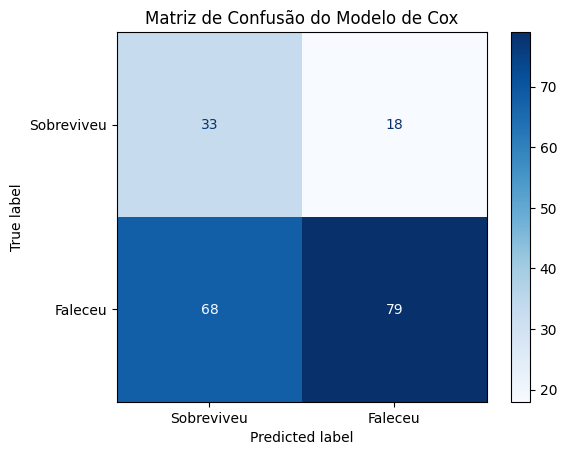

Sensibilidade (Recall): 0.54
Especificidade: 0.65


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Defina um threshold (ponto de corte) para classificar os pacientes em alto risco ou baixo risco
threshold = 1.0  # Ajuste o threshold conforme necess√°rio

# Prever a fun√ß√£o de risco parcial (hazard) usando o modelo Cox ajustado
predicted_risk = cph.predict_partial_hazard(Xt)

# Criar uma coluna de previs√£o de risco baseado no threshold
predicted_event = predicted_risk >= threshold

# Extraindo o valor real dos eventos (0 ou 1, onde 1 indica que o evento ocorreu, e 0 que n√£o ocorreu)
real_event = Xt['event']

# Criar a matriz de confus√£o
cm = confusion_matrix(real_event, predicted_event)

# Exibir a matriz de confus√£o usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sobreviveu', 'Faleceu'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confus√£o do Modelo de Cox')
plt.show()

# Extrair Verdadeiros Negativos (TN), Falsos Positivos (FP), Falsos Negativos (FN) e Verdadeiros Positivos (TP)
tn, fp, fn, tp = cm.ravel()

# Calcular Sensibilidade e Especificidade
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Sensibilidade (Recall): {sensitivity:.2f}')
print(f'Especificidade: {specificity:.2f}')


### <font color=#FFB90F>**Survival Prediction**

#### <font color = #63B8FF>**Explica√ß√£o**

---

<font color=00BFFF00BFFF#00FF7F>Aqui, foi realizada as previs√µes de sobreviv√™ncia com base no banco de dados inicial e ajustado. E seguida √© feita a compara√ß√£o do tempo real de sobrevida com os tempos estimados. Por fim, s√£o feitas diversas compara√ß√µes usando gr√°ficos e an√°lises espec√≠ficas dos pacientes, para ajudar o entendimento dos resultados.

---

<font color=#FFB90F>**predict_survival_function():**

<font color=00BFFF00BFFF#00FF7F> √â utilizada para prever a fun√ß√£o de sobreviv√™ncia para um conjunto de dados fornecido. A fun√ß√£o de sobreviv√™ncia descreve a probabilidade de um indiv√≠duo sobreviver al√©m de um determinado tempo $ùë°$.

<center><font size="5" color=#EEDD82>$ùëÜ(ùë°) = ùëÉ(ùëá > ùë°)$</center><font>

* <font color=#FF0000#DAA520>**$ùëÜ(ùë°)$**</font> = Probabilidade de um indiv√≠duo sobreviver al√©m de um tempo espec√≠fico $ùë°$;

* <font color=#FF0000#DAA520>**$ùëá$**</font> = Tempo de sobreviv√™ncia at√© o evento de interesse.

<font color=00BFFF00BFFF#00FF7F> Ap√≥s ajustada para um conjunto de dados, √© poss√≠vel se calcular a fun√ß√£o de sobreviv√™ncia esperada para cada indiv√≠duo no conjunto de dados de entrada, com base nos par√¢metros estimados do modelo ajustado. O ajuste envolve estimar os coeficientes de risco proporcional $(ùõΩ)$ que maximizam a verossimilhan√ßa dos dados de treinamento.

<center><font size="5" color=#EEDD82>$$h(t|x_i) = h_0(t).e^{x_i \beta}$$</center><font>

* <font color=#FF0000#DAA520>**$h(t|x_i)$**</font> = Fun√ß√£o de risco para o tempo t dada as covari√°veis para um indiv√≠duo;

* <font color=#FF0000#DAA520>**$h_0(t)$**</font> = Fun√ß√£o de risco base (Hazard baseline) sendo comum para todos os indiv√≠duos;

* <font color=#FF0000#DAA520>**$ùë•_ùëñ$**</font> = Covari√°veis para um indiv√≠duo;

* <font color=#FF0000#DAA520>**$ùõΩ$**</font> = Coeficientes de risco proporcional.

<center><font size="5" color="#EEDD82">$$H(t) = \int_0^t h(u) \, du$$</font></center>

* <font color=#FF0000#DAA520>**$ùêª(ùë°)$**</font> = Integral do hazard ratio ao longo do tempo at√© $ùë°$.

<center><font size="5" color="#EEDD82">$$S(t|x_i) = e^{-H(t|x_i)}$$</font></center>

* <font color=#FF0000#DAA520>**$S(t|x_i)$**</font> = Fun√ß√£o de sobreviv√™ncia calculada usando a fun√ß√£o de risco acumulado $ùêª(ùë°)$.

<font color=00BFFF00BFFF#00FF7F> Por fim, $H(t|x_i)$ √© calculado como:

<center><font size="5" color="#EEDD82">$$H(t|x_i) = H_0(t).e^{x_i \beta}$$</font></center>

* <font color=#FF0000#DAA520>**$H(t|x_i)$**</font> = Fun√ß√£o de risco acumulado para o modelo de sobreviv√™ncia;

* <font color=#FF0000#DAA520>**$H_0(t)$**</font> = Fun√ß√£o de risco acumulado baseline.

---

<font color=#FFB90F>**predict_expectation():**

<font color=00BFFF00BFFF#00FF7F>Fun√ß√£o que prev√™ o tempo de sobreviv√™ncia m√©dio (ou "expectativa de sobreviv√™ncia"). Em outras palavras, para cada observa√ß√£o (indiv√≠duo ou paciente), ela retorna o tempo m√©dio estimado at√© a ocorr√™ncia do evento de interesse (por exemplo, morte).

<center><font size="5" color="#EEDD82">$$S(t|X_i) = e^{-H(t|X_i)}$$</font></center>

* <font color=#FF0000#DAA520>**$S(t|X_i)$**</font> = Fun√ß√£o de sobreviv√™ncia para um indiv√≠duo ùëñ;

* <font color=#FF0000#DAA520>**$H(t|X_i)$**</font> = Fun√ß√£o de risco cumulativa para um indiv√≠duo ùëñ.


<font color=00BFFF00BFFF#00FF7F>Ap√≥s ajustada para um conjunto de dados, √© poss√≠vel se calcular a fun√ß√£o de sobreviv√™ncia esperada para cada indiv√≠duo no conjunto de dados de entrada, com base nos par√¢metros estimados do modelo ajustado. O ajuste envolve estimar os coeficientes de risco proporcional (Œ≤)  que maximizam a verossimilhan√ßa dos dados de treinamento.

<center><font size="5" color="#EEDD82">$$h(t|X) = h_0(t) e^{\beta^T X}$$</font></center>

* <font color=#FF0000#DAA520>**$h(t|X)$**</font> = Fun√ß√£o de risco (hazard function) para o tempo t dado o vetor de covari√°veis X;

* <font color=#FF0000#DAA520>**$h_0(t)$**</font> = Fun√ß√£o de risco base (baseline hazard) sendo comum para todos os indiv√≠duos;

* <font color=#FF0000#DAA520>**$X$**</font> = Covari√°veis;

* <font color=#FF0000#DAA520>**$ùõΩ$**</font> = Coeficientes de risco proporcional.

---

<font color=#FFB90F>**Diferen√ßas:**

* <font color=#FF0000#DAA520>**predict_survival_function()**</font>

  * Retorna uma fun√ß√£o completa de sobreviv√™ncia para cada indiv√≠duo, mostrando a probabilidade de sobreviv√™ncia em todos os pontos de tempo.

  * Usada quando se deseja entender a din√¢mica de sobreviv√™ncia ao longo do tempo ou visualizar as curvas de sobreviv√™ncia. (vis√£o mais detalhada)


* <font color=#FF0000#DAA520>**predict_expectation()**</font>

  * Retorna um √∫nico valor (tempo de sobreviv√™ncia esperado) para cada indiv√≠duo.

  * Usada quando se deseja uma estimativa m√©dia de sobreviv√™ncia (vis√£o mais simplificada)

#### <font color=#AB82FF>**predict_survival_function**

##### <font color=#FFE4C4>**Modelo Original**

In [ ]:
from lifelines import CoxPHFitter

# Ajusta o modelo de Cox para o modelo original usando uma nova inst√¢ncia
cph_original = CoxPHFitter()
cph_original.fit(Xt, duration_col='days', event_col='event')

# Realiza previs√µes da fun√ß√£o de sobreviv√™ncia usando o modelo original
y_pred_original = cph_original.predict_survival_function(Xt)

# Converte os valores de probabilidade para porcentagem
y_pred_original_percent = y_pred_original * 100

# Aplica a formata√ß√£o para exibir 6 casas decimais
y_pred_original_percent = y_pred_original_percent.map(lambda x: f"{x:.6f}")

# Exibe as previs√µes como porcentagens com 9 casas decimais
print("Previs√µes de tempo X Pacientes (em porcentagem)")
display(y_pred_original_percent)

Previs√µes de tempo X Pacientes (em porcentagem)


0           1           2           3           4    \
125.0   100.000000  100.000000  100.000000  100.000000  100.000000   
269.0   100.000000  100.000000  100.000000  100.000000  100.000000   
289.0   100.000000  100.000000  100.000000  100.000000  100.000000   
394.0   100.000000  100.000000  100.000000  100.000000  100.000000   
404.0   100.000000  100.000000  100.000000  100.000000  100.000000   
...            ...         ...         ...         ...         ...   
7023.0    0.000000    1.138380    0.000000   15.503187    2.911940   
7057.0    0.000000    0.336957    0.000000    9.336967    1.112811   
7185.0    0.000000    0.336957    0.000000    9.336967    1.112811   
8711.0    0.000000    0.009922    0.000000    2.150504    0.068665   
9108.0    0.000000    0.000015    0.000000    0.143554    0.000404   

               5           6           7           8           9    ...  \
125.0   100.000000  100.000000  100.000000  100.000000  100.000000  ...   
269.0   100.000000  100.000000  100.000000  100.000000  100.000000  ...   
289.0   100.000000  100.000000  100.000000  100.000000  100.000000  ...   
394.0   100.000000  100.000000  100.000000  100.000000  100.000000  ...   
404.0   100.000000  100.000000  100.000000  100.000000  100.000000  ...   
...            ...         ...         ...         ...         ...  ...   
7023.0    1.206354    0.231123    0.002061   13.559814    7.870010  ...   
7057.0    0.362755    0.044338    0.000109    7.874380    3.941553  ...   
7185.0    0.362755    0.044338    0.000109    7.874380    3.941553  ...   
8711.0    0.011181    0.000372    0.000000    1.632057    0.532208  ...   
9108.0    0.000018    0.000000    0.000000    0.089691    0.013274  ...   

               188         189         190         191         192  \
125.0   100.000000  100.000000  100.000000  100.000000  100.000000   
269.0   100.000000  100.000000  100.000000  100.000000  100.000000   
289.0   100.000000  100.000000  100.000000  100.000000  100.000000   
394.0   100.000000  100.000000  100.000000  100.000000  100.000000   
404.0   100.000000  100.000000  100.000000  100.000000  100.000000   
...            ...         ...         ...         ...         ...   
7023.0    0.000000    0.000000    0.000000    0.000000   12.465495   
7057.0    0.000000    0.000000    0.000000    0.000000    7.075085   
7185.0    0.000000    0.000000    0.000000    0.000000    7.075085   
8711.0    0.000000    0.000000    0.000000    0.000000    1.372355   
9108.0    0.000000    0.000000    0.000000    0.000000    0.066745   

               193         194         195         196         197  
125.0   100.000000  100.000000  100.000000  100.000000  100.000000  
269.0   100.000000  100.000000  100.000000  100.000000  100.000000  
289.0   100.000000  100.000000  100.000000  100.000000  100.000000  
394.0   100.000000  100.000000  100.000000  100.000000  100.000000  
404.0   100.000000  100.000000  100.000000  100.000000  100.000000  
...            ...         ...         ...         ...         ...  
7023.0    0.000015    0.021436    0.000000    0.000000    0.000000  
7057.0    0.000000    0.002154    0.000000    0.000000    0.000000  
7185.0    0.000000    0.002154    0.000000    0.000000    0.000000  
8711.0    0.000000    0.000003    0.000000    0.000000    0.000000  
9108.0    0.000000    0.000000    0.000000    0.000000    0.000000  

[195 rows x 198 columns]

In [ ]:
# Extrai os tempos de sobreviv√™ncia reais da vari√°vel de resposta y
# 'y' √© uma lista de tuplas onde cada tupla cont√©m (evento, tempo)
y_surv = [tup[-1] for tup in y]

# Calcula os tempos de sobreviv√™ncia previstos para o modelo original
tempo_previsto_original = []
for i in range(len(y_surv)):
    func_sobrevivencia = y_pred_original.iloc[:, i] # Para cada paciente, extrai a fun√ß√£o de sobreviv√™ncia (coluna i de y_pred_original)

    # Encontra o tempo em que a fun√ß√£o de sobreviv√™ncia cai abaixo ou atinge 0.5 (50% de chance de sobreviver)
    # Se a fun√ß√£o de sobreviv√™ncia n√£o atingir 0.5, usa o √∫ltimo tempo dispon√≠vel
    tempo_previsto_original.append(func_sobrevivencia[func_sobrevivencia <= 0.5].index[0]
                                   if any(func_sobrevivencia <= 0.5)
                                   else func_sobrevivencia.index[-1])

# Cria um DataFrame para comparar os tempos de sobreviv√™ncia reais e previstos do modelo original
df_ns = pd.DataFrame({'Tempo em dias (Real)': y_surv, 'Tempo em dias (Previsto)': tempo_previsto_original})

# Exibe o DataFrame gerado, mostrando a compara√ß√£o entre os tempos reais e previstos do modelo original
display(df_ns)

Tempo em dias (Real)  Tempo em dias (Previsto)
0                   723.0                    4596.0
1                  6591.0                    5779.0
2                   524.0                    4744.0
3                  6255.0                    6249.0
4                  3822.0                    5909.0
..                    ...                       ...
193                5673.0                    5101.0
194                 404.0                    5551.0
195                2225.0                    4487.0
196                2722.0                    4681.0
197                1781.0                    3492.0

[198 rows x 2 columns]

##### <font color=#FFE4C4>**Valores Significativos**

In [ ]:
# Ajusta o modelo de Cox para o modelo significativo usando outra nova inst√¢ncia
cph_significativo = CoxPHFitter()
cph_significativo.fit(Xt_significativos, duration_col='days', event_col='event')

# Realiza previs√µes da fun√ß√£o de sobreviv√™ncia usando o modelo significativo
y_pred_significativos = cph_significativo.predict_survival_function(Xt_significativos)
print("Previs√µes de tempo X Pacientes")
display(y_pred_significativos)

Previs√µes de tempo X Pacientes


0         1         2         3         4         5         6    \
125.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
269.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
289.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
394.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
404.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...          ...       ...       ...       ...       ...       ...       ...   
7023.0  0.001998  0.015462  0.119063  0.043469  0.023651  0.030632  0.053844   
7057.0  0.000804  0.008395  0.087174  0.027459  0.013665  0.018383  0.035096   
7185.0  0.000804  0.008395  0.087174  0.027459  0.013665  0.018383  0.035096   
8711.0  0.000161  0.002856  0.050279  0.012205  0.005189  0.007464  0.016487   
9108.0  0.000010  0.000453  0.019637  0.003054  0.000992  0.001600  0.004535   

             7         8         9    ...           188       189       190  \
125.0   1.000000  1.000000  1.000000  ...  1.000000e+00  1.000000  1.000000   
269.0   1.000000  1.000000  1.000000  ...  1.000000e+00  1.000000  1.000000   
289.0   1.000000  1.000000  1.000000  ...  1.000000e+00  1.000000  1.000000   
394.0   1.000000  1.000000  1.000000  ...  1.000000e+00  1.000000  1.000000   
404.0   1.000000  1.000000  1.000000  ...  1.000000e+00  1.000000  1.000000   
...          ...       ...       ...  ...           ...       ...       ...   
7023.0  0.006704  0.015099  0.054553  ...  1.113896e-04  0.003779  0.035505   
7057.0  0.003221  0.008169  0.035626  ...  2.935913e-05  0.001669  0.021773   
7185.0  0.003221  0.008169  0.035626  ...  2.935913e-05  0.001669  0.021773   
8711.0  0.000883  0.002762  0.016793  ...  2.789236e-06  0.000394  0.009184   
9108.0  0.000097  0.000433  0.004646  ...  5.000317e-08  0.000034  0.002102   

             191       192       193       194       195           196  \
125.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000e+00   
269.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000e+00   
289.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000e+00   
394.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000e+00   
404.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000e+00   
...          ...       ...       ...       ...       ...           ...   
7023.0  0.013636  0.057749  0.040002  0.042137  0.002116  1.340914e-04   
7057.0  0.007268  0.038030  0.024963  0.026497  0.000858  3.631618e-05   
7185.0  0.007268  0.038030  0.024963  0.026497  0.000858  3.631618e-05   
8711.0  0.002394  0.018192  0.010859  0.011683  0.000175  3.619708e-06   
9108.0  0.000359  0.005161  0.002619  0.002884  0.000011  7.043284e-08   

             197  
125.0   1.000000  
269.0   1.000000  
289.0   1.000000  
394.0   1.000000  
404.0   1.000000  
...          ...  
7023.0  0.026066  
7057.0  0.015277  
7185.0  0.015277  
8711.0  0.005949  
9108.0  0.001188  

[195 rows x 198 columns]

In [ ]:
# Calcula os tempos de sobreviv√™ncia previstos para o modelo significativo
tempo_previsto_significativo = []
for i in range(len(y_surv)):
    func_sobrevivencia = y_pred_significativos.iloc[:, i] # Para cada paciente, extrai a fun√ß√£o de sobreviv√™ncia (coluna i de y_pred_significativos)

    # Encontra o tempo em que a fun√ß√£o de sobreviv√™ncia cai abaixo ou atinge 0.5 (50% de chance de sobreviver)
    # Se a fun√ß√£o de sobreviv√™ncia n√£o atingir 0.5, usa o √∫ltimo tempo dispon√≠vel
    tempo_previsto_significativo.append(func_sobrevivencia[func_sobrevivencia <= 0.5].index[0]
                                        if any(func_sobrevivencia <= 0.5)
                                        else func_sobrevivencia.index[-1])

# Cria um DataFrame para comparar os tempos de sobreviv√™ncia reais e previstos do modelo significativo
df_s = pd.DataFrame({'Tempo em dias (Real)': y_surv, 'Tempo em dias (Previsto)': tempo_previsto_significativo})

# Exibe o DataFrame gerado, mostrando a compara√ß√£o entre os tempos reais e previstos do modelo significativo
display(df_s)

Tempo em dias (Real)  Tempo em dias (Previsto)
0                   723.0                    4720.0
1                  6591.0                    5156.0
2                   524.0                    5723.0
3                  6255.0                    5530.0
4                  3822.0                    5306.0
..                    ...                       ...
193                5673.0                    5433.0
194                 404.0                    5519.0
195                2225.0                    4744.0
196                2722.0                    4352.0
197                1781.0                    5316.0

[198 rows x 2 columns]

##### <font color=#FFE4C4>**Compara√ß√£o/Pacientes espec√≠ficos**

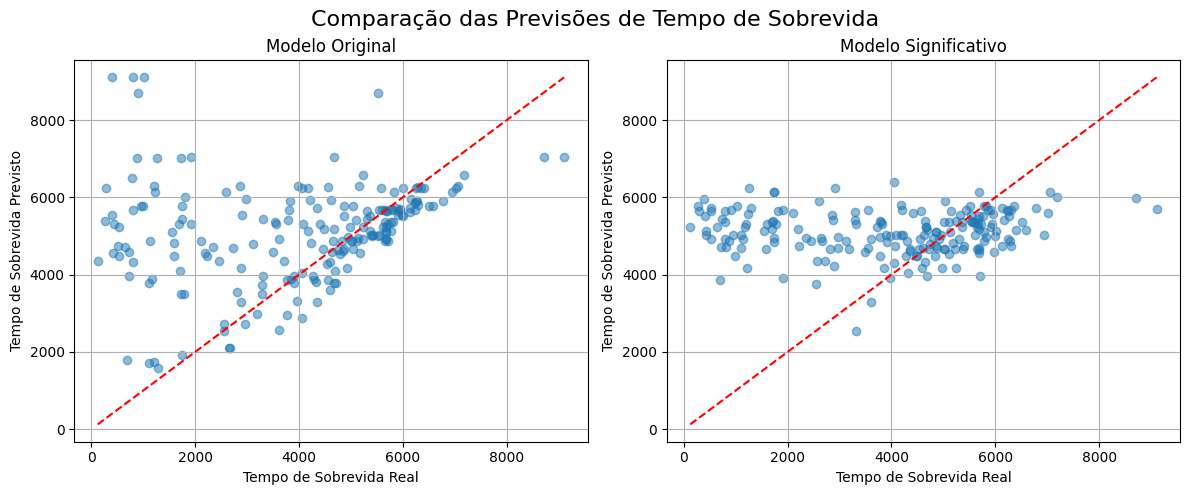

In [ ]:
# Gr√°fico de compara√ß√£o
plt.figure(figsize=(12, 5))

# Gr√°fico para o modelo original
plt.subplot(1, 2, 1)
plt.scatter(df_ns['Tempo em dias (Real)'], df_ns['Tempo em dias (Previsto)'], alpha=0.5)
plt.plot([df_ns['Tempo em dias (Real)'].min(), df_ns['Tempo em dias (Real)'].max()],
         [df_ns['Tempo em dias (Real)'].min(), df_ns['Tempo em dias (Real)'].max()],
         'r--')
plt.xlabel('Tempo de Sobrevida Real')
plt.ylabel('Tempo de Sobrevida Previsto')
plt.title('Modelo Original')
plt.grid(True)

# Gr√°fico para o modelo com vari√°veis significativas
plt.subplot(1, 2, 2)
plt.scatter(df_s['Tempo em dias (Real)'], df_s['Tempo em dias (Previsto)'], alpha=0.5)
plt.plot([df_s['Tempo em dias (Real)'].min(), df_s['Tempo em dias (Real)'].max()],
         [df_s['Tempo em dias (Real)'].min(), df_s['Tempo em dias (Real)'].max()],
         'r--')
plt.xlabel('Tempo de Sobrevida Real')
plt.ylabel('Tempo de Sobrevida Previsto')
plt.title('Modelo Significativo')
plt.grid(True)

# Ajusta o layout e exibe a figura
plt.tight_layout()
plt.suptitle('Compara√ß√£o das Previs√µes de Tempo de Sobrevida', fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

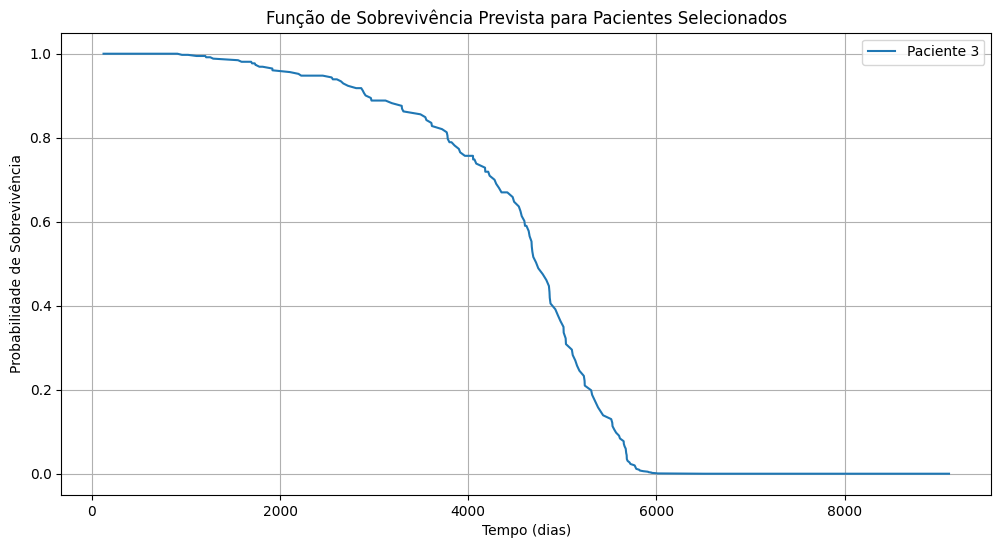

In [ ]:
from lifelines import CoxPHFitter

# Ajusta o modelo de Cox Proportional Hazards usando o DataFrame Xt
cph = CoxPHFitter()
cph.fit(Xt, duration_col='days', event_col='event')

# Realiza previs√µes da fun√ß√£o de sobreviv√™ncia para todos os pacientes
survival_functions = cph.predict_survival_function(Xt)

# Lista de pacientes para exibir (√≠ndices come√ßam em 0)
pacientes = [2]

# Visualiza a fun√ß√£o de sobreviv√™ncia para os pacientes selecionados
plt.figure(figsize=(12, 6))
for i in pacientes:  # Itera sobre os pacientes selecionados
    plt.plot(survival_functions.index, survival_functions.iloc[:, i], label=f"Paciente {i+1}")

# Configura√ß√µes do gr√°fico
plt.title("Fun√ß√£o de Sobreviv√™ncia Prevista para Pacientes Selecionados")
plt.xlabel("Tempo (dias)")
plt.ylabel("Probabilidade de Sobreviv√™ncia")
plt.legend()
plt.grid(True)
plt.show()

#### <font color=	#FF34B3>**predict_expectation**

##### <font color=#FFE4C4>**Modelo Original**

In [ ]:
# Previs√£o da fun√ß√£o de sobreviv√™ncia usando o modelo original
funcoes_sobrevivencia_original = cph.predict_survival_function(Xt)

# Exibir as previs√µes da fun√ß√£o de sobreviv√™ncia para os primeiros pacientes
print("Previs√µes de tempo X Pacientes") # Coluna Vertical X Coluna Horizontal
display(funcoes_sobrevivencia_original)

Previs√µes de tempo X Pacientes


0             1             2         3         4    \
125.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000   
269.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000   
289.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000   
394.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000   
404.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000   
...              ...           ...           ...       ...       ...   
7023.0  3.541595e-17  1.138380e-02  1.844989e-12  0.155032  0.029119   
7057.0  1.186817e-21  3.369568e-03  1.186325e-15  0.093370  0.011128   
7185.0  1.186817e-21  3.369568e-03  1.186325e-15  0.093370  0.011128   
8711.0  1.308871e-34  9.922186e-05  6.790536e-25  0.021505  0.000687   
9108.0  1.698205e-58  1.493812e-07  6.221313e-42  0.001436  0.000004   

                 5             6             7         8         9    ...  \
125.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  ...   
269.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  ...   
289.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  ...   
394.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  ...   
404.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  ...   
...              ...           ...           ...       ...       ...  ...   
7023.0  1.206354e-02  2.311234e-03  2.060751e-05  0.135598  0.078700  ...   
7057.0  3.627545e-03  4.433817e-04  1.094925e-06  0.078744  0.039416  ...   
7185.0  3.627545e-03  4.433817e-04  1.094925e-06  0.078744  0.039416  ...   
8711.0  1.118111e-04  3.718838e-06  2.230861e-10  0.016321  0.005322  ...   
9108.0  1.831243e-07  5.529087e-10  3.502188e-17  0.000897  0.000133  ...   

                  188           189            190           191       192  \
125.0    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  1.000000   
269.0    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  1.000000   
289.0    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  1.000000   
394.0    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  1.000000   
404.0    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  1.000000   
...               ...           ...            ...           ...       ...   
7023.0  4.122113e-143  2.160526e-21   5.999652e-60  4.110360e-09  0.124655   
7057.0  7.668783e-182  5.167876e-27   4.667311e-76  2.151566e-11  0.070751   
7185.0  7.668783e-182  5.167876e-27   4.667311e-76  2.151566e-11  0.070751   
8711.0  5.434489e-294  2.729989e-43  1.054166e-122  5.338512e-18  0.013724   
9108.0   0.000000e+00  2.688497e-73  1.075254e-208  3.553027e-30  0.000667   

                 193           194           195           196            197  
125.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00  
269.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00  
289.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00  
394.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00  
404.0   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00  
...              ...           ...           ...           ...            ...  
7023.0  1.497316e-07  2.143610e-04  1.727017e-19  1.310279e-13   1.279098e-53  
7057.0  2.084092e-09  2.153641e-05  1.360243e-24  4.103293e-17   5.240201e-68  
7185.0  2.084092e-09  2.153641e-05  1.360243e-24  4.103293e-17   5.240201e-68  
8711.0  8.779039e-15  2.775858e-08  2.265467e-39  2.924917e-27  1.143029e-109  
9108.0  1.081084e-24  1.306605e-13  1.292172e-66  5.757803e-46  1.803751e-186  

[195 rows x 198 columns]

In [ ]:
from lifelines import CoxPHFitter

# Modelo original:
# Ajuste do modelo original
cph_original = CoxPHFitter()
cph_original_fitado = cph_original.fit(Xt, duration_col='days', event_col='event')

# Previs√£o do tempo de sobrevida para o modelo original
y_pred_tempo_original = cph_original_fitado.predict_expectation(Xt)

# Exibindo as previs√µes para o modelo original
df_pred_tempo_original = pd.DataFrame({'Tempo de Sobrevida (Real)': Xt['days'], 'Tempo de Sobrevida (Previsto)': y_pred_tempo_original})
display(df_pred_tempo_original)

Tempo de Sobrevida (Real)  Tempo de Sobrevida (Previsto)
0                        723.0                    4110.711668
1                       6591.0                    5511.438501
2                        524.0                    4365.868999
3                       6255.0                    6123.381980
4                       3822.0                    5657.070883
..                         ...                            ...
193                     5673.0                    4745.071175
194                      404.0                    5135.599383
195                     2225.0                    4007.890100
196                     2722.0                    4296.710552
197                     1781.0                    3140.007487

[198 rows x 2 columns]

##### <font color=#FFE4C4>**Valores Significativos**

In [ ]:
from lifelines import CoxPHFitter

# Ajustar o modelo com o conjunto de vari√°veis significativas
cph_significativo = CoxPHFitter()
cph_significativo_fitado = cph_significativo.fit(Xt_significativos, duration_col='days', event_col='event')

# Previs√£o da fun√ß√£o de sobreviv√™ncia usando o modelo ajustado
funcoes_sobrevivencia_significativo = cph_significativo_fitado.predict_survival_function(Xt_significativos)

# Exibir as previs√µes da fun√ß√£o de sobreviv√™ncia para os primeiros pacientes
print("Previs√µes de tempo X Pacientes") # Coluna Vertical X Coluna Horizontal
display(funcoes_sobrevivencia_significativo)

Previs√µes de tempo X Pacientes


0         1         2         3         4         5         6    \
125.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
269.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
289.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
394.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
404.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...          ...       ...       ...       ...       ...       ...       ...   
7023.0  0.001998  0.015462  0.119063  0.043469  0.023651  0.030632  0.053844   
7057.0  0.000804  0.008395  0.087174  0.027459  0.013665  0.018383  0.035096   
7185.0  0.000804  0.008395  0.087174  0.027459  0.013665  0.018383  0.035096   
8711.0  0.000161  0.002856  0.050279  0.012205  0.005189  0.007464  0.016487   
9108.0  0.000010  0.000453  0.019637  0.003054  0.000992  0.001600  0.004535   

             7         8         9    ...           188       189       190  \
125.0   1.000000  1.000000  1.000000  ...  1.000000e+00  1.000000  1.000000   
269.0   1.000000  1.000000  1.000000  ...  1.000000e+00  1.000000  1.000000   
289.0   1.000000  1.000000  1.000000  ...  1.000000e+00  1.000000  1.000000   
394.0   1.000000  1.000000  1.000000  ...  1.000000e+00  1.000000  1.000000   
404.0   1.000000  1.000000  1.000000  ...  1.000000e+00  1.000000  1.000000   
...          ...       ...       ...  ...           ...       ...       ...   
7023.0  0.006704  0.015099  0.054553  ...  1.113896e-04  0.003779  0.035505   
7057.0  0.003221  0.008169  0.035626  ...  2.935913e-05  0.001669  0.021773   
7185.0  0.003221  0.008169  0.035626  ...  2.935913e-05  0.001669  0.021773   
8711.0  0.000883  0.002762  0.016793  ...  2.789236e-06  0.000394  0.009184   
9108.0  0.000097  0.000433  0.004646  ...  5.000317e-08  0.000034  0.002102   

             191       192       193       194       195           196  \
125.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000e+00   
269.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000e+00   
289.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000e+00   
394.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000e+00   
404.0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000e+00   
...          ...       ...       ...       ...       ...           ...   
7023.0  0.013636  0.057749  0.040002  0.042137  0.002116  1.340914e-04   
7057.0  0.007268  0.038030  0.024963  0.026497  0.000858  3.631618e-05   
7185.0  0.007268  0.038030  0.024963  0.026497  0.000858  3.631618e-05   
8711.0  0.002394  0.018192  0.010859  0.011683  0.000175  3.619708e-06   
9108.0  0.000359  0.005161  0.002619  0.002884  0.000011  7.043284e-08   

             197  
125.0   1.000000  
269.0   1.000000  
289.0   1.000000  
394.0   1.000000  
404.0   1.000000  
...          ...  
7023.0  0.026066  
7057.0  0.015277  
7185.0  0.015277  
8711.0  0.005949  
9108.0  0.001188  

[195 rows x 198 columns]

In [ ]:
from lifelines import CoxPHFitter

# Ajuste do modelo com vari√°veis significativas (caso ainda n√£o tenha feito)
cph_significativo = CoxPHFitter()
cph_significativo.fit(Xt_significativos, duration_col='days', event_col='event')

# Previs√£o do tempo de sobrevida para o modelo com vari√°veis significativas
y_pred_tempo_significativo = cph_significativo.predict_expectation(Xt_significativos)

# Exibindo as previs√µes para o modelo com vari√°veis significativas
df_pred_tempo_significativo = pd.DataFrame({
    'Tempo de Sobrevida (Real)': Xt_significativos['days'],
    'Tempo de Sobrevida (Previsto)': y_pred_tempo_significativo
})
display(df_pred_tempo_significativo)

Tempo de Sobrevida (Real)  Tempo de Sobrevida (Previsto)
0                        723.0                    4317.685799
1                       6591.0                    4734.148520
2                        524.0                    5511.173442
3                       6255.0                    5044.892756
4                       3822.0                    4849.135129
..                         ...                            ...
193                     5673.0                    5015.447150
194                      404.0                    5033.758333
195                     2225.0                    4327.334820
196                     2722.0                    3939.659862
197                     1781.0                    4877.646121

[198 rows x 2 columns]

##### <font color=#FFE4C4>**Compara√ß√£o**

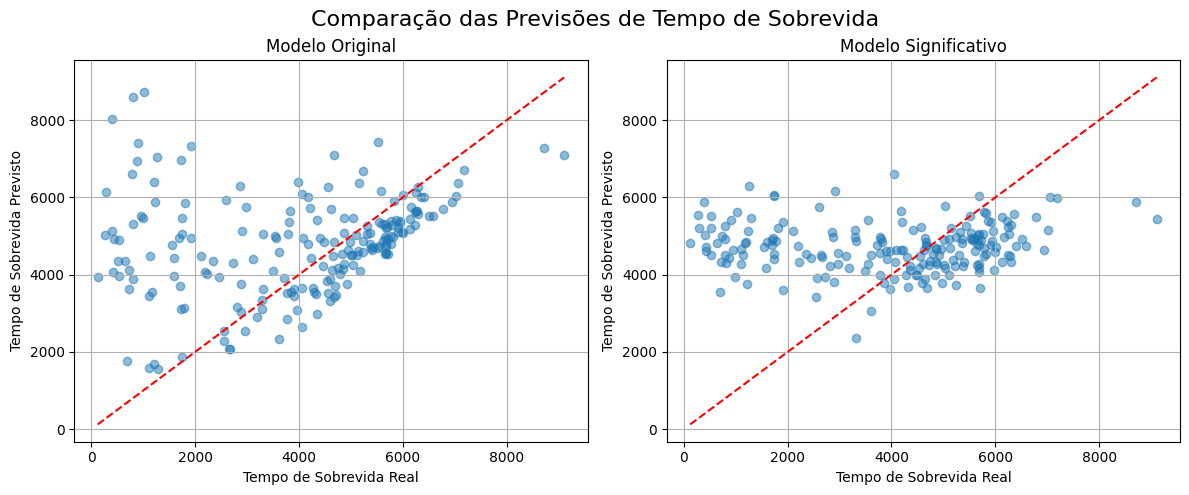

In [ ]:
# Ajustando os DataFrames para ter os nomes corretos das colunas
df_pred_tempo_original.columns = ['Tempo de Sobrevida Real', 'Tempo de Sobrevida Previsto (Original)']
df_pred_tempo_significativo.columns = ['Tempo de Sobrevida Real', 'Tempo de Sobrevida Previsto (Significativo)']

# Configura a figura para visualiza√ß√£o
plt.figure(figsize=(12, 5))

# Gr√°fico para o modelo original
plt.subplot(1, 2, 1)
plt.scatter(df_pred_tempo_original['Tempo de Sobrevida Real'], df_pred_tempo_original['Tempo de Sobrevida Previsto (Original)'], alpha=0.5)
plt.plot([df_pred_tempo_original['Tempo de Sobrevida Real'].min(), df_pred_tempo_original['Tempo de Sobrevida Real'].max()],
         [df_pred_tempo_original['Tempo de Sobrevida Real'].min(), df_pred_tempo_original['Tempo de Sobrevida Real'].max()],
         'r--')
plt.xlabel('Tempo de Sobrevida Real')
plt.ylabel('Tempo de Sobrevida Previsto')
plt.title('Modelo Original')
plt.grid(True)

# Gr√°fico para o modelo com vari√°veis significativas
plt.subplot(1, 2, 2)
plt.scatter(df_pred_tempo_significativo['Tempo de Sobrevida Real'], df_pred_tempo_significativo['Tempo de Sobrevida Previsto (Significativo)'], alpha=0.5)
plt.plot([df_pred_tempo_significativo['Tempo de Sobrevida Real'].min(), df_pred_tempo_significativo['Tempo de Sobrevida Real'].max()],
         [df_pred_tempo_significativo['Tempo de Sobrevida Real'].min(), df_pred_tempo_significativo['Tempo de Sobrevida Real'].max()],
         'r--')
plt.xlabel('Tempo de Sobrevida Real')
plt.ylabel('Tempo de Sobrevida Previsto')
plt.title('Modelo Significativo')
plt.grid(True)

# Ajusta o layout e exibe a figura
plt.tight_layout()
plt.suptitle('Compara√ß√£o das Previs√µes de Tempo de Sobrevida', fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

### <font color=#FFB90F>**Kaplan-Meier**


#### <font color = #63B8FF>**Explica√ß√£o**

---

<font color=00BFFF00BFFF#00FF7F>Aqui foi usado o estimador de Kaplan-Meier, que √© uma ferramenta n√£o param√©trica usada para estimar a fun√ß√£o de sobreviv√™ncia a partir de dados censurados. No caso, ele foi usado para a fazer a plotagem da curva de sobreviv√™ncia usando como par√¢metros os dias e o evento.

---

* <font color=#FF0000#DAA520>**KaplanMeierFitter():**</font> Cria o estimador.
* <font color=#FF0000#DAA520>**fit():**</font> Ajusta o modelo aos dados de sobreviv√™ncia.
* <font color=#FF0000#DAA520>**plot_survival_function():**</font> Plota a curva de sobreviv√™ncia.

---

#### <font color = #AB82FF>**Curva de Sobreviv√™ncia de Kaplan-Meier**

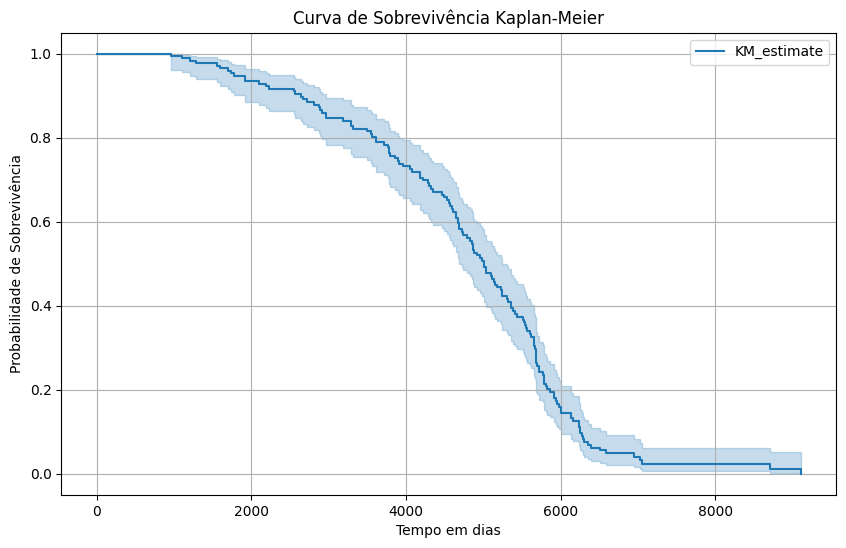

In [ ]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter() # Cria uma inst√¢ncia do estimador Kaplan-Meier
kmf.fit(Xt['days'], Xt['event']) # Ajusta o modelo Kaplan-Meier aos dados de dura√ß√£o e evento

# Configura a figura para o gr√°fico da curva de sobreviv√™ncia
plt.figure(figsize=(10,6))

# Cria um gr√°fico da curva de sobreviv√™ncia de Kaplan-Meier
kmf.plot_survival_function()
plt.title('Curva de Sobreviv√™ncia Kaplan-Meier')
plt.xlabel('Tempo em dias')
plt.ylabel('Probabilidade de Sobreviv√™ncia')
plt.grid(True)
plt.show()

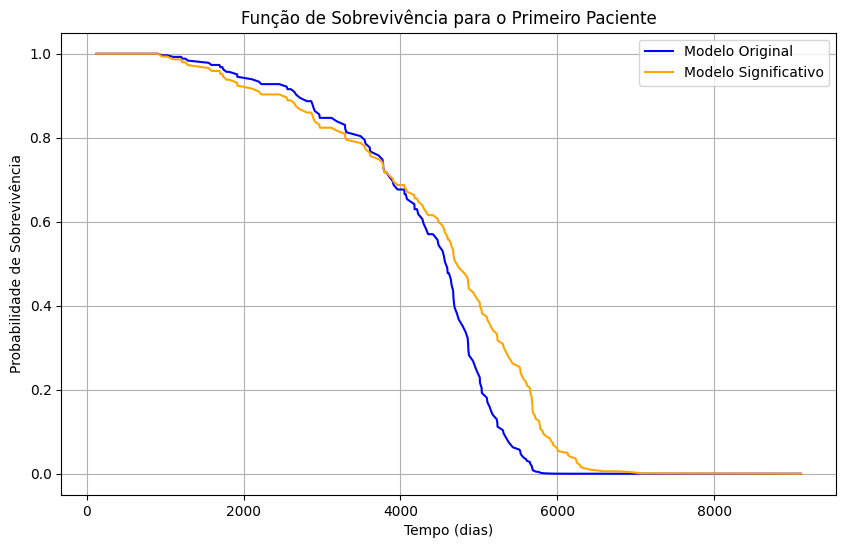

In [ ]:
from lifelines import CoxPHFitter

# Ajuste do modelo com o conjunto de dados original
cph_original = CoxPHFitter()
cph_original.fit(Xt, duration_col='days', event_col='event')

# Previs√£o da fun√ß√£o de sobreviv√™ncia usando o modelo original
funcoes_sobrevivencia_original = cph_original.predict_survival_function(Xt)

# Ajuste do modelo com as vari√°veis significativas
cph_significativo = CoxPHFitter()
cph_significativo.fit(Xt_significativos, duration_col='days', event_col='event')

# Previs√£o da fun√ß√£o de sobreviv√™ncia usando o modelo com vari√°veis significativas
funcoes_sobrevivencia_significativo = cph_significativo.predict_survival_function(Xt_significativos)




# Visualiza√ß√£o das fun√ß√µes de sobreviv√™ncia para um paciente espec√≠fico (por exemplo, o primeiro paciente)
plt.figure(figsize=(10, 6))

# Fun√ß√£o de sobreviv√™ncia para o primeiro paciente do modelo original
plt.plot(funcoes_sobrevivencia_original.index, funcoes_sobrevivencia_original.iloc[:, 0], label="Modelo Original", color="blue")

# Fun√ß√£o de sobreviv√™ncia para o primeiro paciente do modelo com vari√°veis significativas
plt.plot(funcoes_sobrevivencia_significativo.index, funcoes_sobrevivencia_significativo.iloc[:, 0], label="Modelo Significativo", color="orange")

plt.title("Fun√ß√£o de Sobreviv√™ncia para o Primeiro Paciente")
plt.xlabel("Tempo (dias)")
plt.ylabel("Probabilidade de Sobreviv√™ncia")
plt.legend()
plt.grid(True)
plt.show()

### <font color=#FFB90F>**Hazard Ratios**

#### <font color = #63B8FF>**Explica√ß√£o**

---

<font color=00BFFF00BFFF#00FF7F>Esta se√ß√£o calcula as hazard ratios, que indicam o risco relativo de falha (evento) para diferentes grupos ou indiv√≠duos com base em suas caracter√≠sticas. Eles s√£o utilizados nos modelos de risco proporcional de Cox, onde ajudam a entender o efeito de vari√°veis preditoras (covari√°veis) sobre o tempo at√© a ocorr√™ncia do evento.

---

* <font color=#FF0000#DAA520>**predict_partial_hazard():**</font> Gera os chances (scores) de risco para cada indiv√≠duo contido no banco de dados.

---

<font color=00BFFF00BFFF#00FF7F>O hazard ratio √© uma medida do qu√£o frequentemente um evento ocorre em um grupo em compara√ß√£o com outro grupo, durante um determinado per√≠odo de tempo. E ap√≥s ele ser calculado a partir do modelo de Cox, o mesmo pode ter as seguintes interpreta√ß√µes:

<font color=#FF0000#DAA520>**HR = 1:**</font>

* Indica que n√£o h√° diferen√ßa no risco de ocorr√™ncia do evento entre os grupos comparados. Ou seja, a vari√°vel em quest√£o n√£o afeta o risco de falha.


<font color=#FF0000#DAA520>**HR > 1:**</font>

* Indica que o grupo de interesse tem um risco maior de ocorr√™ncia do evento em compara√ß√£o ao grupo de refer√™ncia. Por exemplo, um HR de 1,5 sugere que o grupo de interesse tem um risco 50% maior de falha (evento ocorrer) do que o grupo de refer√™ncia.

<font color=#FF0000#DAA520>**HR < 1:**</font>

* Indica que o grupo de interesse tem um risco menor de ocorr√™ncia do evento em compara√ß√£o ao grupo de refer√™ncia. Por exemplo, um HR de 0,7 sugere que o grupo de interesse tem um risco 30% menor de falha (evento ocorrer) do que o grupo de refer√™ncia.

<center><font size="5" color=#EEDD82>$HR = e^{Œ≤}$</center><font>

<font color=#FF0000#DAA520>$HR$</font> = Hazard Ratio

<font color=#FF0000#DAA520>$Œ≤$</font> = Coeficiente estimado para a covari√°vel no modelo de Cox.

---

#### <font color = #C0FF3E>**C√≥digo**

In [ ]:
# Calcula as previs√µes de risco (hazard ratios) para os dados
risk_scores = cph.predict_partial_hazard(Xt)
print("Previs√µes de risco para os dados:")
display(risk_scores)

Previs√µes de risco para os dados:


0      2.773091
1      0.327649
2      1.977987
3      0.136470
4      0.258891
         ...   
193    1.150429
194    0.618454
195    3.162805
196    2.171610
197    8.916123
Length: 198, dtype: float64

In [ ]:
# Extrai os tempos de sobreviv√™ncia (em dias) da vari√°vel de resposta y
time_days = [tup[-1] for tup in y]

# Cria um DataFrame com as previs√µes de risco e os tempos de sobreviv√™ncia
df_h = pd.DataFrame({'Tempo em dias': time_days, 'Previs√µes de risco': risk_scores})
display(df_h)

Tempo em dias  Previs√µes de risco
0            723.0            2.773091
1           6591.0            0.327649
2            524.0            1.977987
3           6255.0            0.136470
4           3822.0            0.258891
..             ...                 ...
193         5673.0            1.150429
194          404.0            0.618454
195         2225.0            3.162805
196         2722.0            2.171610
197         1781.0            8.916123

[198 rows x 2 columns]

In [ ]:
# Maior previs√£o de risco
max_risk = risk_scores.max()
print(f"Maior previs√£o de risco: {max_risk}")

Maior previs√£o de risco: 70.84221107012726


#### <font color=#AB82FF>**Gr√°fico de Dispers√£o e Histograma**

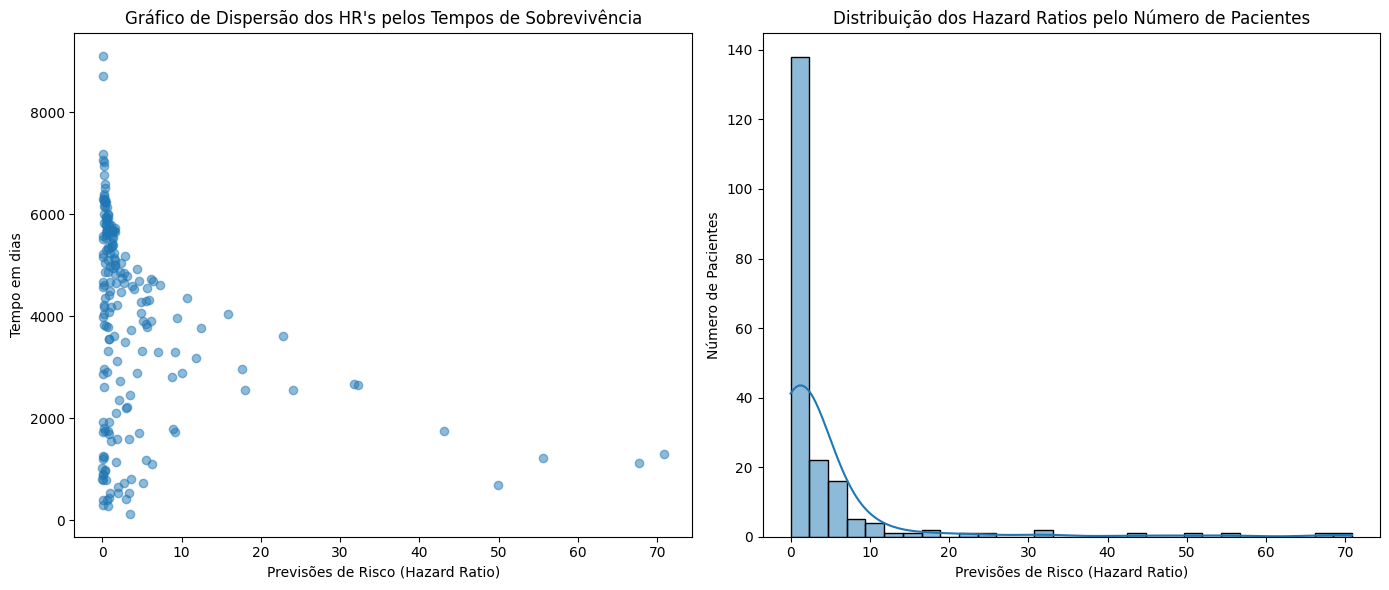

In [ ]:
# Verificar a distribui√ß√£o dos HRs e tempos de sobreviv√™ncia
plt.figure(figsize=(14, 6))

# Gr√°fico de dispers√£o para verificar a rela√ß√£o entre HRs e tempos de sobreviv√™ncia
plt.subplot(1, 2, 1)
plt.scatter(df_h['Previs√µes de risco'], df_h['Tempo em dias'], alpha=0.5)
plt.xlabel('Previs√µes de Risco (Hazard Ratio)')
plt.ylabel('Tempo em dias')
plt.title("Gr√°fico de Dispers√£o dos HR's pelos Tempos de Sobreviv√™ncia")

# Histograma para ver a distribui√ß√£o dos HRs
plt.subplot(1, 2, 2)
sns.histplot(df_h['Previs√µes de risco'], bins=30, kde=True)
plt.xlabel('Previs√µes de Risco (Hazard Ratio)')
plt.ylabel('N√∫mero de Pacientes')
plt.title('Distribui√ß√£o dos Hazard Ratios pelo N√∫mero de Pacientes')

plt.tight_layout()
plt.show()

#### <font color=#FF34B3>**Boxplots para os Diferentes Grupos de Risco**

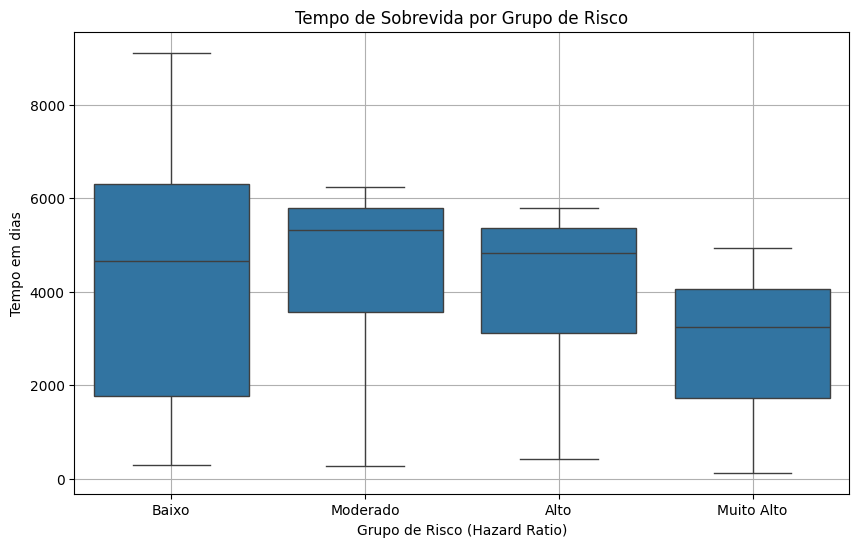

In [ ]:
# Adiciona uma nova coluna ao DataFrame 'df_h' categorizando os pacientes em quartis com base no Hazard Ratio
# A fun√ß√£o pd.qcut() cria categorias de tamanhos iguais (quartis) para os hazard ratios
df_h['Grupo de Risco'] = pd.qcut(df_h['Previs√µes de risco'], q=4, labels=['Baixo', 'Moderado', 'Alto', 'Muito Alto'])

# Configura a figura para o gr√°fico de boxplot
plt.figure(figsize=(10, 6))

# Cria um gr√°fico de boxplot que mostra a distribui√ß√£o do tempo de sobrevida para cada grupo de risco
# x='Grupo de Risco' especifica a vari√°vel categ√≥rica no eixo x
# y='Tempo em dias' especifica a vari√°vel num√©rica no eixo y
# data=df_h especifica o DataFrame usado para plotagem
sns.boxplot(x='Grupo de Risco', y='Tempo em dias', data=df_h)

# Define o r√≥tulo do eixo x
plt.xlabel('Grupo de Risco (Hazard Ratio)')

# Define o r√≥tulo do eixo y
plt.ylabel('Tempo em dias')

# Define o t√≠tulo do gr√°fico
plt.title('Tempo de Sobrevida por Grupo de Risco')

# Adiciona uma grade para facilitar a leitura do gr√°fico
plt.grid(True)

# Exibe o gr√°fico gerado
plt.show()


#### <font color=#AB82FF>**Gr√°fico de Dispers√£o e Histograma**

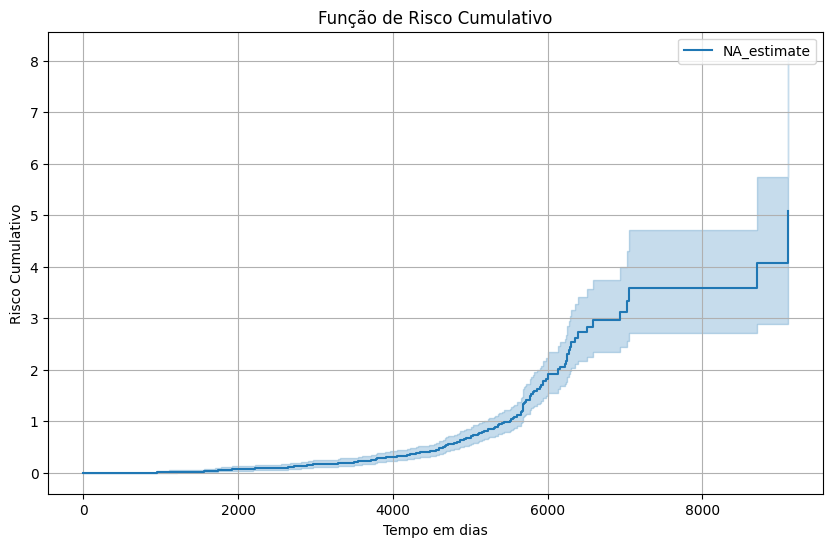

In [ ]:
from lifelines import NelsonAalenFitter

# Estima a fun√ß√£o de risco cumulativo usando o Nelson-Aalen Fitter
# NelsonAalenFitter √© um estimador n√£o param√©trico para a fun√ß√£o de risco cumulativo
naf = NelsonAalenFitter()

# Ajusta o modelo aos dados de sobreviv√™ncia
# Xt['days'] √© o tempo de sobreviv√™ncia, e Xt['event'] √© a vari√°vel indicadora de evento (1 se o evento ocorreu, 0 se n√£o ocorreu)
naf.fit(Xt['days'], event_observed=Xt['event'])

# Visualiza√ß√£o da fun√ß√£o de risco cumulativo
# Plota a fun√ß√£o de risco cumulativo estimada
plt.figure(figsize=(10, 6))
naf.plot()

# Define o t√≠tulo do gr√°fico
plt.title('Fun√ß√£o de Risco Cumulativo')

# Define o r√≥tulo do eixo x (Tempo em dias)
plt.xlabel('Tempo em dias')

# Define o r√≥tulo do eixo y (Risco Cumulativo)
plt.ylabel('Risco Cumulativo')

# Adiciona uma grade ao gr√°fico
plt.grid(True)

# Exibe o gr√°fico gerado
plt.show()